## Che-Wei Yeh
## USCID: 7415538737
## GITHUB ID: Boximao

## 1

### (a)

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import dc_stat_think as dcst
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.feature_selection import RFE
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from matplotlib import image

In [3]:
print('Data Downloaded')

Data Downloaded


### (b)

In [4]:
# loading testing sets
df_test=pd.DataFrame()
test_bend1_1=pd.read_csv('..\\data\\bending1\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_bend1_1))
test_bend1_2=pd.read_csv('..\\data\\bending1\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_bend1_2))
test_bend2_1=pd.read_csv('..\\data\\bending2\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_bend2_1))
test_bend2_2=pd.read_csv('..\\data\\bending2\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_bend2_2))
test_cycling_1=pd.read_csv('..\\data\\cycling\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_cycling_1))
test_cycling_2=pd.read_csv('..\\data\\cycling\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_cycling_2))
test_cycling_3=pd.read_csv('..\\data\\cycling\\dataset3.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_cycling_3))
test_lying_1=pd.read_csv('..\\data\\lying\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_lying_1))
test_lying_2=pd.read_csv('..\\data\\lying\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_lying_2))
test_lying_3=pd.read_csv('..\\data\\lying\\dataset3.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_lying_3))
test_sitting_1=pd.read_csv('..\\data\\sitting\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_sitting_1))
test_sitting_2=pd.read_csv('..\\data\\sitting\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_sitting_2))
test_sitting_3=pd.read_csv('..\\data\\sitting\\dataset3.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_sitting_3))
test_standing_1=pd.read_csv('..\\data\\standing\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_standing_1))
test_standing_2=pd.read_csv('..\\data\\standing\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_standing_2))
test_standing_3=pd.read_csv('..\\data\\standing\\dataset3.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_standing_3))
test_walking_1=pd.read_csv('..\\data\\walking\\dataset1.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_walking_1))
test_walking_2=pd.read_csv('..\\data\\walking\\dataset2.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_walking_2))
test_walking_3=pd.read_csv('..\\data\\walking\\dataset3.csv',skiprows=4)
df_test=df_test.append(pd.DataFrame(test_walking_3))
df_test

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      39.25       0.43      22.75       0.43      33.75   
1                250      39.25       0.43      23.00       0.00      33.00   
2                500      39.25       0.43      23.25       0.43      33.00   
3                750      39.50       0.50      23.00       0.71      33.00   
4               1000      39.50       0.50      24.00       0.00      33.00   
..               ...        ...        ...        ...        ...        ...   
475           118750      36.00       2.45      17.00       5.10      20.50   
476           119000      34.33       1.89      15.00       2.45      17.00   
477           119250      33.00       7.35      14.60       3.14      13.00   
478           119500      31.67       1.25      11.00       6.16      19.25   
479           119750      30.75      10.21      11.75       1.09      18.50   

     var_rss23  
0         1.30  
1         0.00  
2         0.00  
3         0.00  
4         0.00  
..         ...  
475       0.87  
476       2.12  
477       5.70  
478       2.17  
479       3.20  

[9120 rows x 7 columns]

In [5]:
# training sets for bending1
df_train=pd.DataFrame()
train_bend1_3=pd.read_csv('..\\data\\bending1\\dataset3.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend1_3))
train_bend1_4=pd.read_csv('..\\data\\bending1\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend1_4))
train_bend1_5=pd.read_csv('..\\data\\bending1\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend1_5))
train_bend1_6=pd.read_csv('..\\data\\bending1\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend1_6))
train_bend1_7=pd.read_csv('..\\data\\bending1\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend1_7))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      44.25       0.83      16.25       1.30      24.00   
476           119000      44.00       0.71      11.00       1.00      24.00   
477           119250      44.25       0.43      10.25       1.30      22.75   
478           119500      43.75       0.43       7.33       2.87      21.50   
479           119750      44.50       0.50       3.00       1.22      21.50   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       0.00  
476       0.00  
477       0.83  
478       0.50  
479       0.50  

[2400 rows x 7 columns]

In [6]:
# training sets for bending2
train_bend2_3=pd.read_csv('..\\data\\bending2\\dataset3.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend2_3))
train_bend2_4=pd.read_csv('..\\data\\bending2\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend2_4))
train_bend2_5=pd.read_csv('..\\data\\bending2\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend2_5))
train_bend2_6=pd.read_csv('..\\data\\bending2\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_bend2_6))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      27.00       0.00      14.00       0.00       6.50   
476           119000      27.00       0.00      15.00       0.00       4.00   
477           119250      27.00       0.00      14.25       0.83       4.00   
478           119500      27.00       0.00      13.33       1.25       1.50   
479           119750      26.50       0.50      15.00       0.00       3.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       0.50  
476       1.00  
477       2.00  
478       0.50  
479       0.00  

[4320 rows x 7 columns]

In [7]:
# training sets for cycling
train_cycling_4=pd.read_csv('..\\data\\cycling\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_4))
train_cycling_5=pd.read_csv('..\\data\\cycling\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_5))
train_cycling_6=pd.read_csv('..\\data\\cycling\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_6))
train_cycling_7=pd.read_csv('..\\data\\cycling\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_7))
train_cycling_8=pd.read_csv('..\\data\\cycling\\dataset8.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_8))
train_cycling_9=pd.read_csv('..\\data\\cycling\\dataset9.csv',skiprows=4,usecols = [i for i in range(7)])
df_train=df_train.append(pd.DataFrame(train_cycling_9))
train_cycling_10=pd.read_csv('..\\data\\cycling\\dataset10.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_10))
train_cycling_11=pd.read_csv('..\\data\\cycling\\dataset11.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_11))
train_cycling_12=pd.read_csv('..\\data\\cycling\\dataset12.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_12))
train_cycling_13=pd.read_csv('..\\data\\cycling\\dataset13.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_13))
train_cycling_14=pd.read_csv('..\\data\\cycling\\dataset14.csv',skiprows=4,usecols = [i for i in range(7)])
df_train=df_train.append(pd.DataFrame(train_cycling_14))
train_cycling_15=pd.read_csv('..\\data\\cycling\\dataset15.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_cycling_15))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      38.00       2.55      18.25       2.17      20.00   
476           119000      36.00       0.00      19.00       1.41      13.67   
477           119250      37.00       1.73      17.75       0.43      22.50   
478           119500      37.00       3.74      19.00       4.18      22.00   
479           119750      38.75       1.92      16.75       3.49      21.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       4.74  
476       1.25  
477       0.87  
478       1.41  
479       3.67  

[10080 rows x 7 columns]

In [8]:
# training sets for lying
train_lying_4=pd.read_csv('..\\data\\lying\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_4))
train_lying_5=pd.read_csv('..\\data\\lying\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_5))
train_lying_6=pd.read_csv('..\\data\\lying\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_6))
train_lying_7=pd.read_csv('..\\data\\lying\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_7))
train_lying_8=pd.read_csv('..\\data\\lying\\dataset8.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_8))
train_lying_9=pd.read_csv('..\\data\\lying\\dataset9.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_9))
train_lying_10=pd.read_csv('..\\data\\lying\\dataset10.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_10))
train_lying_11=pd.read_csv('..\\data\\lying\\dataset11.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_11))
train_lying_12=pd.read_csv('..\\data\\lying\\dataset12.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_12))
train_lying_13=pd.read_csv('..\\data\\lying\\dataset13.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_13))
train_lying_14=pd.read_csv('..\\data\\lying\\dataset14.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_14))
train_lying_15=pd.read_csv('..\\data\\lying\\dataset15.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_lying_15))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      29.25       0.43       4.00       0.00      10.50   
476           119000      29.25       0.43       4.00       0.00      10.25   
477           119250      29.50       0.50       2.33       0.94       9.67   
478           119500      29.00       0.00       2.67       0.47      10.00   
479           119750      29.00       0.00       2.75       0.43      11.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       0.50  
476       0.83  
477       0.94  
478       0.82  
479       0.82  

[15840 rows x 7 columns]

In [9]:
# training sets for sitting
train_sitting_4=pd.read_csv('..\\data\\sitting\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_4))
train_sitting_5=pd.read_csv('..\\data\\sitting\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_5))
train_sitting_6=pd.read_csv('..\\data\\sitting\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_6))
train_sitting_7=pd.read_csv('..\\data\\sitting\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_7))
train_sitting_8=pd.read_csv('..\\data\\sitting\\dataset8.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_8))
train_sitting_9=pd.read_csv('..\\data\\sitting\\dataset9.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_9))
train_sitting_10=pd.read_csv('..\\data\\sitting\\dataset10.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_10))
train_sitting_11=pd.read_csv('..\\data\\sitting\\dataset11.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_11))
train_sitting_12=pd.read_csv('..\\data\\sitting\\dataset12.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_12))
train_sitting_13=pd.read_csv('..\\data\\sitting\\dataset13.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_13))
train_sitting_14=pd.read_csv('..\\data\\sitting\\dataset14.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_14))
train_sitting_15=pd.read_csv('..\\data\\sitting\\dataset15.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_sitting_15))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      41.00       0.82      17.25       1.30      11.00   
476           119000      41.50       0.50      18.00       0.00      10.67   
477           119250      41.33       0.47      18.67       0.47      11.00   
478           119500      41.50       0.50      18.50       0.50      12.33   
479           119750      41.50       0.50      17.00       1.00      13.50   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       0.82  
476       1.25  
477       1.41  
478       0.47  
479       1.12  

[21600 rows x 7 columns]

In [10]:
# training sets for standing
train_standing_4=pd.read_csv('..\\data\\standing\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_4))
train_standing_5=pd.read_csv('..\\data\\standing\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_5))
train_standing_6=pd.read_csv('..\\data\\standing\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_6))
train_standing_7=pd.read_csv('..\\data\\standing\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_7))
train_standing_8=pd.read_csv('..\\data\\standing\\dataset8.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_8))
train_standing_9=pd.read_csv('..\\data\\standing\\dataset9.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_9))
train_standing_10=pd.read_csv('..\\data\\standing\\dataset10.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_10))
train_standing_11=pd.read_csv('..\\data\\standing\\dataset11.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_11))
train_standing_12=pd.read_csv('..\\data\\standing\\dataset12.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_12))
train_standing_13=pd.read_csv('..\\data\\standing\\dataset13.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_13))
train_standing_14=pd.read_csv('..\\data\\standing\\dataset14.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_14))
train_standing_15=pd.read_csv('..\\data\\standing\\dataset15.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_standing_15))
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      45.25       0.43      12.25       0.43      13.75   
476           119000      45.00       0.00      12.60       0.80      14.25   
477           119250      45.00       0.00      12.00       0.00      14.50   
478           119500      45.50       0.50      12.25       0.43      14.50   
479           119750      45.00       0.00      12.50       0.87      14.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       0.83  
476       0.83  
477       0.50  
478       0.50  
479       0.71  

[27360 rows x 7 columns]

In [11]:
# training sets for walking
train_walking_4=pd.read_csv('..\\data\\walking\\dataset4.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_4))
train_walking_5=pd.read_csv('..\\data\\walking\\dataset5.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_5))
train_walking_6=pd.read_csv('..\\data\\walking\\dataset6.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_6))
train_walking_7=pd.read_csv('..\\data\\walking\\dataset7.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_7))
train_walking_8=pd.read_csv('..\\data\\walking\\dataset8.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_8))
train_walking_9=pd.read_csv('..\\data\\walking\\dataset9.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_9))
train_walking_10=pd.read_csv('..\\data\\walking\\dataset10.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_10))
train_walking_11=pd.read_csv('..\\data\\walking\\dataset11.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_11))
train_walking_12=pd.read_csv('..\\data\\walking\\dataset12.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_12))
train_walking_13=pd.read_csv('..\\data\\walking\\dataset13.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_13))
train_walking_14=pd.read_csv('..\\data\\walking\\dataset14.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_14))
train_walking_15=pd.read_csv('..\\data\\walking\\dataset15.csv',skiprows=4)
df_train=df_train.append(pd.DataFrame(train_walking_15))
df_training=df_train.copy()
df_training


# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      34.50       6.18       9.00       3.56      12.67   
476           119000      25.75       6.02      13.75       2.05      16.00   
477           119250      31.50       3.35      10.25       5.12      16.25   
478           119500      33.75       2.77      14.00       3.24      13.75   
479           119750      37.00       1.41      18.25       3.70      11.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       4.19  
476       1.58  
477       2.95  
478       0.43  
479       4.32  

[33120 rows x 7 columns]

### (c)

### (i)

#### Time-domain time-domain features usually used in time series classification include minimum, maximum, mean, median, variance, standard deviation, first quartile, 3rd quartile, interquartile range, and skewness

In [12]:
features=['min','max','mean','median','var','std','1st_quart','3rd_quart','interquad','skewness']
features

['min',
 'max',
 'mean',
 'median',
 'var',
 'std',
 '1st_quart',
 '3rd_quart',
 'interquad',
 'skewness']

### (ii)

In [13]:
col=['min1','max1','mean1','median1','std1','1st_quart1','3rd_quart1','min2','max2','mean2','median2','std2','1st_quart2','3rd_quart2',
    'min3','max3','mean3','median3','std3','1st_quart3','3rd_quart3','min4','max4','mean4','median4','std4','1st_quart4','3rd_quart4',
     'min5','max5','mean5','median5','std5','1st_quart5','3rd_quart5','min6','max6','mean6','median6','std6','1st_quart6','3rd_quart6']
df=pd.DataFrame()
df

Empty DataFrame
Columns: []
Index: []

In [14]:
df_test

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      39.25       0.43      22.75       0.43      33.75   
1                250      39.25       0.43      23.00       0.00      33.00   
2                500      39.25       0.43      23.25       0.43      33.00   
3                750      39.50       0.50      23.00       0.71      33.00   
4               1000      39.50       0.50      24.00       0.00      33.00   
..               ...        ...        ...        ...        ...        ...   
475           118750      36.00       2.45      17.00       5.10      20.50   
476           119000      34.33       1.89      15.00       2.45      17.00   
477           119250      33.00       7.35      14.60       3.14      13.00   
478           119500      31.67       1.25      11.00       6.16      19.25   
479           119750      30.75      10.21      11.75       1.09      18.50   

     var_rss23  
0         1.30  
1         0.00  
2         0.00  
3         0.00  
4         0.00  
..         ...  
475       0.87  
476       2.12  
477       5.70  
478       2.17  
479       3.20  

[9120 rows x 7 columns]

In [15]:
one_quad1=np.percentile(df_test.iloc[0:480,1],25,interpolation='midpoint')
one_quad1

39.25

In [16]:
# apply to train set
df2=pd.DataFrame()
for x in range(37):
    min1=df_train.iloc[(480*x):(480*x+480),1].min()
    max1=df_train.iloc[(480*x):(480*x+480),1].max()
    mean1=df_train.iloc[(480*x):(480*x+480),1].mean()
    median1=df_train.iloc[(480*x):(480*x+480),1].median()
    std1=df_train.iloc[(480*x):(480*x+480),1].std()
    one_quad1=np.percentile(df_train.iloc[(480*x):(480*x+480),1],25,interpolation='midpoint')
    three_quad1=np.percentile(df_train.iloc[(480*x):(480*x+480),1],75,interpolation='midpoint')
    min2=df_train.iloc[(480*x):(480*x+480),2].min()
    max2=df_train.iloc[(480*x):(480*x+480),2].max()
    mean2=df_train.iloc[(480*x):(480*x+480),2].mean()
    median2=df_train.iloc[(480*x):(480*x+480),2].median()
    std2=df_train.iloc[(480*x):(480*x+480),2].std()
    one_quad2=np.percentile(df_train.iloc[(480*x):(480*x+480),2],25,interpolation='midpoint')
    three_quad2=np.percentile(df_train.iloc[(480*x):(480*x+480),2],75,interpolation='midpoint')
    min3=df_train.iloc[(480*x):(480*x+480),3].min()
    max3=df_train.iloc[(480*x):(480*x+480),3].max()
    mean3=df_train.iloc[(480*x):(480*x+480),3].mean()
    median3=df_train.iloc[(480*x):(480*x+480),3].median()
    std3=df_train.iloc[(480*x):(480*x+480),3].std()
    one_quad3=np.percentile(df_train.iloc[(480*x):(480*x+480),3],25,interpolation='midpoint')
    three_quad3=np.percentile(df_train.iloc[(480*x):(480*x+480),3],75,interpolation='midpoint')
    min4=df_train.iloc[(480*x):(480*x+480),4].min()
    max4=df_train.iloc[(480*x):(480*x+480),4].max()
    mean4=df_train.iloc[(480*x):(480*x+480),4].mean()
    median4=df_train.iloc[(480*x):(480*x+480),4].median()
    std4=df_train.iloc[(480*x):(480*x+480),4].std()
    one_quad4=np.percentile(df_train.iloc[(480*x):(480*x+480),4],25,interpolation='midpoint')
    three_quad4=np.percentile(df_train.iloc[(480*x):(480*x+480),4],75,interpolation='midpoint')
    min5=df_train.iloc[(480*x):(480*x+480),5].min()
    max5=df_train.iloc[(480*x):(480*x+480),5].max()
    mean5=df_train.iloc[(480*x):(480*x+480),5].mean()
    median5=df_train.iloc[(480*x):(480*x+480),5].median()
    std5=df_train.iloc[(480*x):(480*x+480),5].std()
    one_quad5=np.percentile(df_train.iloc[(480*x):(480*x+480),5],25,interpolation='midpoint')
    three_quad5=np.percentile(df_train.iloc[(480*x):(480*x+480),5],75,interpolation='midpoint')
    min6=df_train.iloc[(480*x):(480*x+480),6].min()
    max6=df_train.iloc[(480*x):(480*x+480),6].max()
    mean6=df_train.iloc[(480*x):(480*x+480),6].mean()
    median6=df_train.iloc[(480*x):(480*x+480),6].median()
    std6=df_train.iloc[(480*x):(480*x+480),6].std()
    one_quad6=np.percentile(df_train.iloc[(480*x):(480*x+480),6],25,interpolation='midpoint')
    three_quad6=np.percentile(df_train.iloc[(480*x):(480*x+480),6],75,interpolation='midpoint')
    df2=df2.append(pd.DataFrame([[min1,max1,mean1,median1,std1,one_quad1,three_quad1,min2,max2,mean2,median2,std2,one_quad2,three_quad2,
    min3,max3,mean3,median3,std3,one_quad3,three_quad3,min4,max4,mean4,median4,std4,one_quad4,three_quad4,
    min5,max5,mean5,median5,std5,one_quad5,three_quad5,min6,max6,mean6,median6,std6,one_quad6,three_quad6]]),ignore_index=True)

In [17]:
df2

0      1          2      3         4       5       6    7      8   \
0   35.00  47.40  43.954500  44.33  1.558835  43.000  45.000  0.0   1.70   
1   33.00  47.75  42.179813  43.50  3.670666  39.100  45.000  0.0   3.00   
2   33.00  45.75  41.678063  41.75  2.243490  41.330  42.750  0.0   2.83   
3   37.00  48.00  43.454958  43.25  1.386098  42.500  45.000  0.0   1.58   
4   36.25  48.00  43.969125  44.50  1.618364  43.290  44.670  0.0   1.50   
5   21.00  50.00  32.586208  33.00  6.238143  26.125  34.500  0.0   9.90   
6   27.50  33.00  29.881938  30.00  1.153837  29.000  30.290  0.0   1.00   
7   19.00  45.50  30.938104  29.00  7.684146  26.750  38.000  0.0   6.40   
8   25.00  47.50  31.058250  29.71  4.829794  27.500  31.875  0.0   6.38   
9   19.00  44.00  36.228396  36.00  3.528617  34.000  39.000  0.0  12.28   
10  26.50  44.33  36.687292  36.00  3.529404  34.250  39.415  0.0  12.89   
11  25.33  45.00  37.114312  36.25  3.710385  34.500  40.250  0.0  10.84   
12  26.75  44.75  36.863375  36.33  3.555787  34.500  39.750  0.0  11.68   
13  26.25  44.25  36.957458  36.29  3.434863  34.500  40.250  0.0   8.64   
14  27.75  44.67  37.144833  36.33  3.758904  34.000  40.500  0.0  10.76   
15  27.00  45.00  36.819521  36.00  3.900459  33.750  40.250  0.0  10.47   
16  27.00  44.33  36.541667  36.00  4.018922  33.250  39.875  0.0  10.43   
17  18.50  44.25  35.752354  36.00  4.614802  33.000  39.330  0.0  12.60   
18  19.00  43.75  35.879875  36.00  4.614878  33.000  39.500  0.0  11.20   
19  23.33  43.50  36.244083  36.75  3.822016  33.415  39.250  0.0   9.71   
20  24.25  45.00  37.177042  36.25  3.581301  34.500  40.250  0.0   8.58   
21  34.00  51.00  42.706063  40.50  3.537476  40.250  48.000  0.0   4.85   
22  39.00  41.00  39.667833  39.50  0.280158  39.500  39.750  0.0   1.00   
23   0.00  40.67  39.506187  39.50  1.817498  39.500  39.670  0.0   1.00   
24  39.00  40.00  39.433792  39.50  0.208558  39.330  39.500  0.0   1.00   
25  39.00  40.00  39.347104  39.33  0.231405  39.250  39.500  0.0   0.50   
26  39.00  56.25  47.325125  42.67  5.961280  42.000  54.000  0.0   8.49   
27  23.50  30.00  27.716375  27.50  1.442253  27.000  29.000  0.0   1.79   
28  48.00  48.25  48.004167  48.00  0.032038  48.000  48.000  0.0   0.43   
29  39.00  41.00  39.667833  39.50  0.280158  39.500  39.750  0.0   1.00   
30  39.00  40.00  39.433792  39.50  0.208558  39.330  39.500  0.0   1.00   
31  39.00  56.25  47.325125  42.67  5.961280  42.000  54.000  0.0   8.49   
32  23.50  30.00  27.716375  27.50  1.442253  27.000  29.000  0.0   1.79   
33  42.50  46.00  44.753958  45.00  0.520309  44.750  45.000  0.0   1.12   
34  25.50  45.75  36.560063  36.50  5.915081  30.000  42.500  0.0  12.19   
35  27.00  38.67  32.905979  30.25  3.505776  30.000  37.000  0.0   2.49   
36  27.50  50.75  38.888375  36.75  3.642901  36.250  42.000  0.0   6.06   

          9   ...        32      33      34   35     36        37     38  \
0   0.426250  ...  1.999604  35.325  36.500  0.0   1.79  0.493292  0.430   
1   0.696042  ...  3.849448  30.415  36.330  0.0   2.18  0.613521  0.500   
2   0.535979  ...  2.411026  28.415  31.250  0.0   1.79  0.383292  0.430   
3   0.378083  ...  2.488862  22.250  24.000  0.0   5.26  0.679646  0.500   
4   0.413125  ...  3.318301  20.500  23.750  0.0   2.96  0.555313  0.490   
5   0.516125  ...  5.032424  17.670  23.500  0.0  13.61  1.162042  0.830   
6   0.256438  ...  1.745970  17.000  19.000  0.0   6.40  0.701479  0.710   
7   0.467167  ...  5.845911  15.000  20.875  0.0   6.73  1.107354  0.830   
8   0.405458  ...  7.853427   9.000  18.375  0.0   4.92  1.098104  0.940   
9   2.831687  ...  3.166655  14.000  18.125  0.0   9.98  3.480687  3.340   
10  2.973042  ...  2.978238  14.670  18.500  0.0   8.19  3.073312  2.690   
11  2.730000  ...  2.847876  14.750  18.500  0.0   9.50  3.076354  2.770   
12  2.757312  ...  2.655906  15.000  18.670  0.0   8.81  2.773312  2.590   
13  2.420083  ...  2.851673  14.000  18.250  0.0   8.3

In [18]:
# unnormal set with 1 row missing
df3=pd.DataFrame()
for x in range(37,38,1):
    min1=df_train.iloc[(480*x):(480*x+479),1].min()
    max1=df_train.iloc[(480*x):(480*x+479),1].max()
    mean1=df_train.iloc[(480*x):(480*x+479),1].mean()
    median1=df_train.iloc[(480*x):(480*x+479),1].median()
    std1=df_train.iloc[(480*x):(480*x+479),1].std()
    one_quad1=np.percentile(df_train.iloc[(480*x):(480*x+479),1],25,interpolation='midpoint')
    three_quad1=np.percentile(df_train.iloc[(480*x):(480*x+479),1],75,interpolation='midpoint')
    min2=df_train.iloc[(480*x):(480*x+479),2].min()
    max2=df_train.iloc[(480*x):(480*x+479),2].max()
    mean2=df_train.iloc[(480*x):(480*x+479),2].mean()
    median2=df_train.iloc[(480*x):(480*x+479),2].median()
    std2=df_train.iloc[(480*x):(480*x+479),2].std()
    one_quad2=np.percentile(df_train.iloc[(480*x):(480*x+479),2],25,interpolation='midpoint')
    three_quad2=np.percentile(df_train.iloc[(480*x):(480*x+479),2],75,interpolation='midpoint')
    min3=df_train.iloc[(480*x):(480*x+479),3].min()
    max3=df_train.iloc[(480*x):(480*x+479),3].max()
    mean3=df_train.iloc[(480*x):(480*x+479),3].mean()
    median3=df_train.iloc[(480*x):(480*x+479),3].median()
    std3=df_train.iloc[(480*x):(480*x+479),3].std()
    one_quad3=np.percentile(df_train.iloc[(480*x):(480*x+479),3],25,interpolation='midpoint')
    three_quad3=np.percentile(df_train.iloc[(480*x):(480*x+479),3],75,interpolation='midpoint')
    min4=df_train.iloc[(480*x):(480*x+479),4].min()
    max4=df_train.iloc[(480*x):(480*x+479),4].max()
    mean4=df_train.iloc[(480*x):(480*x+479),4].mean()
    median4=df_train.iloc[(480*x):(480*x+479),4].median()
    std4=df_train.iloc[(480*x):(480*x+479),4].std()
    one_quad4=np.percentile(df_train.iloc[(480*x):(480*x+479),4],25,interpolation='midpoint')
    three_quad4=np.percentile(df_train.iloc[(480*x):(480*x+479),4],75,interpolation='midpoint')
    min5=df_train.iloc[(480*x):(480*x+479),5].min()
    max5=df_train.iloc[(480*x):(480*x+479),5].max()
    mean5=df_train.iloc[(480*x):(480*x+479),5].mean()
    median5=df_train.iloc[(480*x):(480*x+479),5].median()
    std5=df_train.iloc[(480*x):(480*x+479),5].std()
    one_quad5=np.percentile(df_train.iloc[(480*x):(480*x+479),5],25,interpolation='midpoint')
    three_quad5=np.percentile(df_train.iloc[(480*x):(480*x+479),5],75,interpolation='midpoint')
    min6=df_train.iloc[(480*x):(480*x+479),6].min()
    max6=df_train.iloc[(480*x):(480*x+479),6].max()
    mean6=df_train.iloc[(480*x):(480*x+479),6].mean()
    median6=df_train.iloc[(480*x):(480*x+479),6].median()
    std6=df_train.iloc[(480*x):(480*x+479),6].std()
    one_quad6=np.percentile(df_train.iloc[(480*x):(480*x+479),6],25,interpolation='midpoint')
    three_quad6=np.percentile(df_train.iloc[(480*x):(480*x+479),6],75,interpolation='midpoint')
    df3=df3.append(pd.DataFrame([[min1,max1,mean1,median1,std1,one_quad1,three_quad1,min2,max2,mean2,median2,std2,one_quad2,three_quad2,
    min3,max3,mean3,median3,std3,one_quad3,three_quad3,min4,max4,mean4,std4,median4,one_quad4,three_quad4,
    min5,max5,mean5,median5,std5,one_quad5,three_quad5,min6,max6,mean6,median6,std6,one_quad6,three_quad6]]),ignore_index=True)

In [19]:
df3

0     1          2     3         4     5     6    7     8         9   \
0  42.0  45.0  42.821983  42.5  0.891818  42.0  43.5  0.0  1.12  0.335678   

   ...        32     33    34   35    36        37    38        39    40    41  
0  ...  4.112285  13.25  19.0  0.0  6.36  0.856013  0.82  0.764801  0.43  1.09  

[1 rows x 42 columns]

In [20]:
df4=pd.DataFrame()
for x in range(38,69,1):
    min1=df_train.iloc[(480*x-1):(480*x+480-1),1].min()
    max1=df_train.iloc[(480*x-1):(480*x+480-1),1].max()
    mean1=df_train.iloc[(480*x-1):(480*x+480-1),1].mean()
    median1=df_train.iloc[(480*x-1):(480*x+480-1),1].median()
    std1=df_train.iloc[(480*x):(480*x+479),1].std()
    one_quad1=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),1],25,interpolation='midpoint')
    three_quad1=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),1],75,interpolation='midpoint')
    min2=df_train.iloc[(480*x-1):(480*x+480-1),2].min()
    max2=df_train.iloc[(480*x-1):(480*x+480-1),2].max()
    mean2=df_train.iloc[(480*x-1):(480*x+480-1),2].mean()
    median2=df_train.iloc[(480*x-1):(480*x+480-1),2].median()
    std2=df_train.iloc[(480*x):(480*x+479),2].std()
    one_quad2=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),2],25,interpolation='midpoint')
    three_quad2=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),2],75,interpolation='midpoint')
    min3=df_train.iloc[(480*x-1):(480*x+480-1),3].min()
    max3=df_train.iloc[(480*x-1):(480*x+480-1),3].max()
    mean3=df_train.iloc[(480*x-1):(480*x+480-1),3].mean()
    median3=df_train.iloc[(480*x-1):(480*x+480-1),3].median()
    std3=df_train.iloc[(480*x):(480*x+479),3].std()
    one_quad3=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),3],25,interpolation='midpoint')
    three_quad3=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),3],75,interpolation='midpoint')
    min4=df_train.iloc[(480*x-1):(480*x+480-1),4].min()
    max4=df_train.iloc[(480*x-1):(480*x+480-1),4].max()
    mean4=df_train.iloc[(480*x-1):(480*x+480-1),4].mean()
    median4=df_train.iloc[(480*x-1):(480*x+480-1),4].median()
    std4=df_train.iloc[(480*x):(480*x+479),4].std()
    one_quad4=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),4],25,interpolation='midpoint')
    three_quad4=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),4],75,interpolation='midpoint')
    min5=df_train.iloc[(480*x-1):(480*x+480-1),5].min()
    max5=df_train.iloc[(480*x-1):(480*x+480-1),5].max()
    mean5=df_train.iloc[(480*x-1):(480*x+480-1),5].mean()
    median5=df_train.iloc[(480*x-1):(480*x+480-1),5].median()
    std5=df_train.iloc[(480*x):(480*x+479),5].std()
    one_quad5=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),5],25,interpolation='midpoint')
    three_quad5=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),5],75,interpolation='midpoint')
    min6=df_train.iloc[(480*x-1):(480*x+480-1),6].min()
    max6=df_train.iloc[(480*x-1):(480*x+480-1),6].max()
    mean6=df_train.iloc[(480*x-1):(480*x+480-1),6].mean()
    median6=df_train.iloc[(480*x-1):(480*x+480-1),6].median()
    std6=df_train.iloc[(480*x):(480*x+479),6].std()
    one_quad6=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),6],25,interpolation='midpoint')
    three_quad6=np.percentile(df_train.iloc[(480*x-1):(480*x+480-1),6],75,interpolation='midpoint')
    df4=df4.append(pd.DataFrame([[min1,max1,mean1,median1,std1,one_quad1,three_quad1,min2,max2,mean2,median2,std2,one_quad2,three_quad2,
    min3,max3,mean3,median3,std3,one_quad3,three_quad3,min4,max4,mean4,median4,std4,one_quad4,three_quad4,
    min5,max5,mean5,median5,std5,one_quad5,three_quad5,min6,max6,mean6,median6,std6,one_quad6,three_quad6]]),ignore_index=True)

In [21]:
df4

0      1          2       3         4       5       6    7      8   \
0   41.75  46.50  43.192567  42.500  1.230424  42.000  44.500  0.0   1.50   
1   35.25  48.50  40.228125  39.250  2.741753  37.750  42.500  0.0   3.28   
2   28.50  48.25  43.874938  45.250  3.201610  42.000  46.500  0.0   3.28   
3   39.50  45.00  42.113667  42.000  1.123069  41.500  42.000  0.0   1.09   
4   39.67  44.75  42.281208  41.500  1.357561  41.500  44.330  0.0   1.00   
5   40.00  44.67  42.361292  42.000  1.017945  41.500  43.250  0.0   1.00   
6   29.25  46.00  42.729208  43.250  2.047728  41.330  44.500  0.0   4.72   
7   30.00  46.67  42.641229  42.750  2.395424  41.500  45.000  0.0   2.95   
8   36.00  47.50  43.718979  45.000  2.385205  43.000  45.000  0.0   1.92   
9   34.50  47.75  44.472188  45.000  1.774241  45.000  45.250  0.0   2.18   
10  35.50  48.00  46.218687  46.000  1.748255  45.250  48.000  0.0   4.50   
11  29.75  48.00  46.935854  47.500  1.834315  47.250  47.750  0.0   4.60   
12  36.33  47.67  45.402917  45.500  1.329090  45.000  46.330  0.0   1.66   
13  36.00  45.80  42.419229  42.670  2.519997  41.330  44.635  0.0   2.12   
14  37.00  48.25  42.519042  42.500  2.196997  41.000  44.500  0.0   2.12   
15  36.25  45.50  42.957271  42.670  1.499539  42.000  44.330  0.0   2.60   
16  36.00  47.33  42.685521  43.670  2.382903  40.125  44.750  0.0   2.17   
17  36.25  45.75  43.182833  44.750  2.493173  39.750  45.000  0.0   2.83   
18  36.00  47.33  44.434937  45.000  2.420189  44.500  45.750  0.0   4.50   
19  18.00  46.00  35.213125  36.000  4.756815  32.000  38.750  0.0  16.20   
20  20.75  46.25  34.769229  35.330  4.746198  31.670  38.250  0.0  12.68   
21  21.50  51.00  34.935125  35.500  4.649957  32.000  38.125  0.0  12.21   
22  18.33  47.67  34.322625  34.750  4.951098  31.250  38.000  0.0  12.48   
23  18.33  45.75  34.599354  35.125  4.733787  31.500  38.000  0.0  15.37   
24  15.50  43.67  34.237500  34.750  4.445871  31.250  37.375  0.0  17.24   
25  21.50  51.25  34.241729  35.000  4.942383  30.875  37.750  0.0  13.55   
26  19.50  45.33  33.582354  34.250  4.645026  30.250  37.000  0.0  14.67   
27  19.75  45.50  34.331604  35.250  4.756627  31.000  38.000  0.0  13.47   
28  19.50  46.00  34.533208  35.250  4.833657  31.250  37.750  0.0  12.47   
29  23.50  46.25  34.903438  35.290  4.525529  31.750  38.250  0.0  14.82   
30  19.25  44.00  34.454438  35.000  4.800326  31.250  38.000  0.0  13.86   

          9   ...        32      33      34    35     36        37    38  \
0   0.266970  ...  3.030198  14.000  18.330  0.00   5.45  0.807033  0.82   
1   0.614771  ...  5.318382  11.670  19.750  0.00   6.36  1.056625  0.83   
2   0.519021  ...  5.261766  10.500  19.250  0.00   7.00  1.354667  1.09   
3   0.341938  ...  4.852262   9.000  17.250  0.00   6.36  0.961771  0.82   
4   0.498563  ...  6.042960   8.500  18.250  0.00   7.85  0.868292  0.82   
5   0.482354  ...  6.470942   9.750  22.000  0.00   4.64  0.720521  0.50   
6   0.555271  ...  4.296395  13.710  19.000  0.00   5.10  0.891479  0.71   
7   0.403875  ...  3.141841  10.710  14.250  0.00   4.64  0.919688  0.83   
8   0.365667  ...  3.292480  11.250  15.585  0.00   6.18  1.029771  0.83   
9   0.291521  ...  2.615036  12.000  14.875  0.00   4.76  0.935563  0.83   
10  0.312354  ...  2.925471  12.000  15.250  0.00   6.00  0.878333  0.83   
11  0.428771  ...  3.137113  11.585  15.500  0.00   6.58  0.995625  0.83   
12  0.460063  ...  3.373973  11.250  14.500  0.00   4.50  0.796583  0.82   
13  0.461542  ...  3.724915   7.585  12.000  0.00   6.65  1.226271  1.09   
14  0.440688  ...  3.627307  12.500  17.500  0.00   6.85  0.975938  0.83   
15  0.352875  ...  2.705429  14.000  16.710  0.00   4.00  0.749958  0.82   
16  0.417438  ...  3.260503  12.750  16.500  0.00   3.77  0.702042  0.50   
17  0.273000  ...  3.569343  16.500  21.000  0.00   3.83  0.643750  0.50   
18  0.346604  ...  3.417433  11.000  14.670  0.00   5.91  1.155313  0.94   
19  4.317896  ...  3.2

In [22]:
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df

0      1          2      3         4      5      6    7      8   \
0   35.00  47.40  43.954500  44.33  1.558835  43.00  45.00  0.0   1.70   
1   33.00  47.75  42.179813  43.50  3.670666  39.10  45.00  0.0   3.00   
2   33.00  45.75  41.678063  41.75  2.243490  41.33  42.75  0.0   2.83   
3   37.00  48.00  43.454958  43.25  1.386098  42.50  45.00  0.0   1.58   
4   36.25  48.00  43.969125  44.50  1.618364  43.29  44.67  0.0   1.50   
..    ...    ...        ...    ...       ...    ...    ...  ...    ...   
26  19.50  45.33  33.582354  34.25  4.645026  30.25  37.00  0.0  14.67   
27  19.75  45.50  34.331604  35.25  4.756627  31.00  38.00  0.0  13.47   
28  19.50  46.00  34.533208  35.25  4.833657  31.25  37.75  0.0  12.47   
29  23.50  46.25  34.903438  35.29  4.525529  31.75  38.25  0.0  14.82   
30  19.25  44.00  34.454438  35.00  4.800326  31.25  38.00  0.0  13.86   

          9   ...        32      33     34    35     36        37    38  \
0   0.426250  ...  1.999604  35.325  36.50  0.00   1.79  0.493292  0.43   
1   0.696042  ...  3.849448  30.415  36.33  0.00   2.18  0.613521  0.50   
2   0.535979  ...  2.411026  28.415  31.25  0.00   1.79  0.383292  0.43   
3   0.378083  ...  2.488862  22.250  24.00  0.00   5.26  0.679646  0.50   
4   0.413125  ...  3.318301  20.500  23.75  0.00   2.96  0.555313  0.49   
..       ...  ...       ...     ...    ...   ...    ...       ...   ...   
26  4.569750  ...  3.282583  13.710  18.25  0.00   8.32  3.256604  3.11   
27  4.452458  ...  3.120485  13.500  17.75  0.00   9.67  3.432187  3.20   
28  4.381417  ...  2.823774  14.000  17.75  0.00  10.00  3.342625  3.08   
29  4.374729  ...  3.134218  13.750  18.00  0.00   9.51  3.426042  3.27   
30  4.367000  ...  3.152270  13.750  17.75  0.43   9.00  3.338437  3.09   

          39     40     41  
0   0.513506  0.000  0.940  
1   0.524317  0.000  1.000  
2   0.389164  0.000  0.500  
3   0.622534  0.430  0.870  
4   0.487826  0.000  0.830  
..       ...    ...    ...  
26  1.637157  2.050  4.325  
27  1.729971  2.145  4.570  
28  1.658181  2.160  4.385  
29  1.692724  2.170  4.500  
30  1.700299  2.120  4.390  

[69 rows x 42 columns]

In [23]:
df.columns=col
df.index = np.arange(1,len(df)+1)
df

min1   max1      mean1  median1      std1  1st_quart1  3rd_quart1  min2  \
1   35.00  47.40  43.954500    44.33  1.558835       43.00       45.00   0.0   
2   33.00  47.75  42.179813    43.50  3.670666       39.10       45.00   0.0   
3   33.00  45.75  41.678063    41.75  2.243490       41.33       42.75   0.0   
4   37.00  48.00  43.454958    43.25  1.386098       42.50       45.00   0.0   
5   36.25  48.00  43.969125    44.50  1.618364       43.29       44.67   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
65  19.50  45.33  33.582354    34.25  4.645026       30.25       37.00   0.0   
66  19.75  45.50  34.331604    35.25  4.756627       31.00       38.00   0.0   
67  19.50  46.00  34.533208    35.25  4.833657       31.25       37.75   0.0   
68  23.50  46.25  34.903438    35.29  4.525529       31.75       38.25   0.0   
69  19.25  44.00  34.454438    35.00  4.800326       31.25       38.00   0.0   

     max2     mean2  ...      std5  1st_quart5  3rd_quart5  min6   max6  \
1    1.70  0.426250  ...  1.999604      35.325       36.50  0.00   1.79   
2    3.00  0.696042  ...  3.849448      30.415       36.33  0.00   2.18   
3    2.83  0.535979  ...  2.411026      28.415       31.25  0.00   1.79   
4    1.58  0.378083  ...  2.488862      22.250       24.00  0.00   5.26   
5    1.50  0.413125  ...  3.318301      20.500       23.75  0.00   2.96   
..    ...       ...  ...       ...         ...         ...   ...    ...   
65  14.67  4.569750  ...  3.282583      13.710       18.25  0.00   8.32   
66  13.47  4.452458  ...  3.120485      13.500       17.75  0.00   9.67   
67  12.47  4.381417  ...  2.823774      14.000       17.75  0.00  10.00   
68  14.82  4.374729  ...  3.134218      13.750       18.00  0.00   9.51   
69  13.86  4.367000  ...  3.152270      13.750       17.75  0.43   9.00   

       mean6  median6      std6  1st_quart6  3rd_quart6  
1   0.493292     0.43  0.513506       0.000       0.940  
2   0.613521     0.50  0.524317       0.000       1.000  
3   0.383292     0.43  0.389164       0.000       0.500  
4   0.679646     0.50  0.622534       0.430       0.870  
5   0.555313     0.49  0.487826       0.000       0.830  
..       ...      ...       ...         ...         ...  
65  3.256604     3.11  1.637157       2.050       4.325  
66  3.432187     3.20  1.729971       2.145       4.570  
67  3.342625     3.08  1.658181       2.160       4.385  
68  3.426042     3.27  1.692724       2.170       4.500  
69  3.338437     3.09  1.700299       2.120       4.390  

[69 rows x 42 columns]

### (iii)

In [24]:
df.std()

min1          8.794295
max1          4.429182
mean1         4.917403
median1       4.955268
std1          1.758673
1st_quart1    5.732585
3rd_quart1    4.779273
min2          0.000000
max2          5.147841
mean2         1.600576
median2       1.437616
std2          0.903040
1st_quart2    0.952343
3rd_quart2    2.161071
min3          3.048807
max3          4.759243
mean3         3.863126
median3       3.846559
std3          0.995194
1st_quart3    4.145123
3rd_quart3    3.949799
min4          0.000000
max4          2.302408
mean4         1.179693
median4       1.146204
std4          0.478297
1st_quart4    0.839457
3rd_quart4    1.568364
min5          5.368786
max5          5.449726
mean5         5.120564
median5       5.266440
std5          1.058521
1st_quart5    5.541017
3rd_quart5    4.956996
min6          0.051766
max6          2.535184
mean6         1.171135
median6       1.104180
std6          0.519427
1st_quart6    0.772860
3rd_quart6    1.551880
dtype: float64

In [25]:
std=[]
std=[df.std()]
std=pd.DataFrame(std)
std.index=['Standard_deviation']
std

min1      max1     mean1   median1      std1  \
Standard_deviation  8.794295  4.429182  4.917403  4.955268  1.758673   

                    1st_quart1  3rd_quart1  min2      max2     mean2  ...  \
Standard_deviation    5.732585    4.779273   0.0  5.147841  1.600576  ...   

                        std5  1st_quart5  3rd_quart5      min6      max6  \
Standard_deviation  1.058521    5.541017    4.956996  0.051766  2.535184   

                       mean6  median6      std6  1st_quart6  3rd_quart6  
Standard_deviation  1.171135  1.10418  0.519427     0.77286     1.55188  

[1 rows x 42 columns]

In [26]:
bs_reps=dcst.draw_bs_reps(std.iloc[0],np.std,size=10000)
conf_int = np.percentile(bs_reps, [5, 95])
print(f'90% confidence interval: {conf_int}')

90% confidence interval: [1.77409787 2.40418355]


In [27]:
for i in range (0,42):
    bs_reps=dcst.draw_bs_reps(df.iloc[:,i],np.std,size=10000)
    conf_int=np.percentile(bs_reps,[5,95])
    print(f'90% interval for {df.columns[i]}: {conf_int}')

90% interval for min1: [7.4768747  9.95275455]
90% interval for max1: [3.26610051 5.33701056]
90% interval for mean1: [4.28894116 5.40364819]
90% interval for median1: [4.28872238 5.44192965]
90% interval for std1: [1.52942599 1.93197779]
90% interval for 1st_quart1: [5.11267546 6.17160305]
90% interval for 3rd_quart1: [3.90032722 5.49117767]
90% interval for min2: [0. 0.]
90% interval for max2: [4.61018034 5.47617119]
90% interval for mean2: [1.39381299 1.72663917]
90% interval for median2: [1.23303167 1.57004803]
90% interval for std2: [0.80455703 0.95788975]
90% interval for 1st_quart2: [0.81450498 1.0411012 ]
90% interval for 3rd_quart2: [1.89640885 2.32427729]
90% interval for min3: [2.79196318 3.19276502]
90% interval for max3: [3.94481629 5.34570199]
90% interval for mean3: [3.17384141 4.36264273]
90% interval for median3: [3.13441329 4.37353372]
90% interval for std3: [0.77110575 1.19330536]
90% interval for 1st_quart3: [3.44550342 4.65568888]
90% interval for 3rd_quart3: [3.23

### (iv)

In [28]:
print('Mean value would be an important feature, as we can observe the difference between different categories and also \nwould not be impacted too much by the outliers given the size of the dataset.')
print('Standard Deviation would also be an important feature as it indicates how widely is the sampled data spread.')
print('Median may also be important, as together with mean they can determine the skewness of the distribution.')

Mean value would be an important feature, as we can observe the difference between different categories and also 
would not be impacted too much by the outliers given the size of the dataset.
Standard Deviation would also be an important feature as it indicates how widely is the sampled data spread.
Median may also be important, as together with mean they can determine the skewness of the distribution.


## 2

### (a)

### i

In [29]:
df_train_2=df
df_train_2.index = np.arange(1,70)
index = df_train_2.index
num_of_rows = len(index)
df_train_2['is_bend']=0
df_train_2

min1   max1      mean1  median1      std1  1st_quart1  3rd_quart1  min2  \
1   35.00  47.40  43.954500    44.33  1.558835       43.00       45.00   0.0   
2   33.00  47.75  42.179813    43.50  3.670666       39.10       45.00   0.0   
3   33.00  45.75  41.678063    41.75  2.243490       41.33       42.75   0.0   
4   37.00  48.00  43.454958    43.25  1.386098       42.50       45.00   0.0   
5   36.25  48.00  43.969125    44.50  1.618364       43.29       44.67   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
65  19.50  45.33  33.582354    34.25  4.645026       30.25       37.00   0.0   
66  19.75  45.50  34.331604    35.25  4.756627       31.00       38.00   0.0   
67  19.50  46.00  34.533208    35.25  4.833657       31.25       37.75   0.0   
68  23.50  46.25  34.903438    35.29  4.525529       31.75       38.25   0.0   
69  19.25  44.00  34.454438    35.00  4.800326       31.25       38.00   0.0   

     max2     mean2  ...  1st_quart5  3rd_quart5  min6   max6     mean6  \
1    1.70  0.426250  ...      35.325       36.50  0.00   1.79  0.493292   
2    3.00  0.696042  ...      30.415       36.33  0.00   2.18  0.613521   
3    2.83  0.535979  ...      28.415       31.25  0.00   1.79  0.383292   
4    1.58  0.378083  ...      22.250       24.00  0.00   5.26  0.679646   
5    1.50  0.413125  ...      20.500       23.75  0.00   2.96  0.555313   
..    ...       ...  ...         ...         ...   ...    ...       ...   
65  14.67  4.569750  ...      13.710       18.25  0.00   8.32  3.256604   
66  13.47  4.452458  ...      13.500       17.75  0.00   9.67  3.432187   
67  12.47  4.381417  ...      14.000       17.75  0.00  10.00  3.342625   
68  14.82  4.374729  ...      13.750       18.00  0.00   9.51  3.426042   
69  13.86  4.367000  ...      13.750       17.75  0.43   9.00  3.338437   

    median6      std6  1st_quart6  3rd_quart6  is_bend  
1      0.43  0.513506       0.000       0.940        0  
2      0.50  0.524317       0.000       1.000        0  
3      0.43  0.389164       0.000       0.500        0  
4      0.50  0.622534       0.430       0.870        0  
5      0.49  0.487826       0.000       0.830        0  
..      ...       ...         ...         ...      ...  
65     3.11  1.637157       2.050       4.325        0  
66     3.20  1.729971       2.145       4.570        0  
67     3.08  1.658181       2.160       4.385        0  
68     3.27  1.692724       2.170       4.500        0  
69     3.09  1.700299       2.120       4.390        0  

[69 rows x 43 columns]

In [30]:
for i in df_train_2.index:
    if i<=10:
        df_train_2['is_bend'][i]=1
    else:
        df_train_2['is_bend'][i]=0

<ipython-input-30-f51183506553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['is_bend'][i]=1
<ipython-input-30-f51183506553>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['is_bend'][i]=0


In [31]:
df_train_iv=df_train_2.copy()
df_train_2

min1   max1      mean1  median1      std1  1st_quart1  3rd_quart1  min2  \
1   35.00  47.40  43.954500    44.33  1.558835       43.00       45.00   0.0   
2   33.00  47.75  42.179813    43.50  3.670666       39.10       45.00   0.0   
3   33.00  45.75  41.678063    41.75  2.243490       41.33       42.75   0.0   
4   37.00  48.00  43.454958    43.25  1.386098       42.50       45.00   0.0   
5   36.25  48.00  43.969125    44.50  1.618364       43.29       44.67   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
65  19.50  45.33  33.582354    34.25  4.645026       30.25       37.00   0.0   
66  19.75  45.50  34.331604    35.25  4.756627       31.00       38.00   0.0   
67  19.50  46.00  34.533208    35.25  4.833657       31.25       37.75   0.0   
68  23.50  46.25  34.903438    35.29  4.525529       31.75       38.25   0.0   
69  19.25  44.00  34.454438    35.00  4.800326       31.25       38.00   0.0   

     max2     mean2  ...  1st_quart5  3rd_quart5  min6   max6     mean6  \
1    1.70  0.426250  ...      35.325       36.50  0.00   1.79  0.493292   
2    3.00  0.696042  ...      30.415       36.33  0.00   2.18  0.613521   
3    2.83  0.535979  ...      28.415       31.25  0.00   1.79  0.383292   
4    1.58  0.378083  ...      22.250       24.00  0.00   5.26  0.679646   
5    1.50  0.413125  ...      20.500       23.75  0.00   2.96  0.555313   
..    ...       ...  ...         ...         ...   ...    ...       ...   
65  14.67  4.569750  ...      13.710       18.25  0.00   8.32  3.256604   
66  13.47  4.452458  ...      13.500       17.75  0.00   9.67  3.432187   
67  12.47  4.381417  ...      14.000       17.75  0.00  10.00  3.342625   
68  14.82  4.374729  ...      13.750       18.00  0.00   9.51  3.426042   
69  13.86  4.367000  ...      13.750       17.75  0.43   9.00  3.338437   

    median6      std6  1st_quart6  3rd_quart6  is_bend  
1      0.43  0.513506       0.000       0.940        1  
2      0.50  0.524317       0.000       1.000        1  
3      0.43  0.389164       0.000       0.500        1  
4      0.50  0.622534       0.430       0.870        1  
5      0.49  0.487826       0.000       0.830        1  
..      ...       ...         ...         ...      ...  
65     3.11  1.637157       2.050       4.325        0  
66     3.20  1.729971       2.145       4.570        0  
67     3.08  1.658181       2.160       4.385        0  
68     3.27  1.692724       2.170       4.500        0  
69     3.09  1.700299       2.120       4.390        0  

[69 rows x 43 columns]

In [32]:
df_train_ex=df_train_2[['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6','is_bend']]
df_train_ex

mean1  median1      std1     mean2  median2      std2     mean6  \
1   43.954500    44.33  1.558835  0.426250     0.47  0.338690  0.493292   
2   42.179813    43.50  3.670666  0.696042     0.50  0.630860  0.613521   
3   41.678063    41.75  2.243490  0.535979     0.50  0.405469  0.383292   
4   43.454958    43.25  1.386098  0.378083     0.47  0.315566  0.679646   
5   43.969125    44.50  1.618364  0.413125     0.47  0.263111  0.555313   
..        ...      ...       ...       ...      ...       ...       ...   
65  33.582354    34.25  4.645026  4.569750     4.26  2.463584  3.256604   
66  34.331604    35.25  4.756627  4.452458     3.90  2.599731  3.432187   
67  34.533208    35.25  4.833657  4.381417     4.15  2.360993  3.342625   
68  34.903438    35.29  4.525529  4.374729     3.91  2.437761  3.426042   
69  34.454438    35.00  4.800326  4.367000     3.98  2.387428  3.338437   

    median6      std6  is_bend  
1      0.43  0.513506        1  
2      0.50  0.524317        1  
3      0.43  0.389164        1  
4      0.50  0.622534        1  
5      0.49  0.487826        1  
..      ...       ...      ...  
65     3.11  1.637157        0  
66     3.20  1.729971        0  
67     3.08  1.658181        0  
68     3.27  1.692724        0  
69     3.09  1.700299        0  

[69 rows x 10 columns]

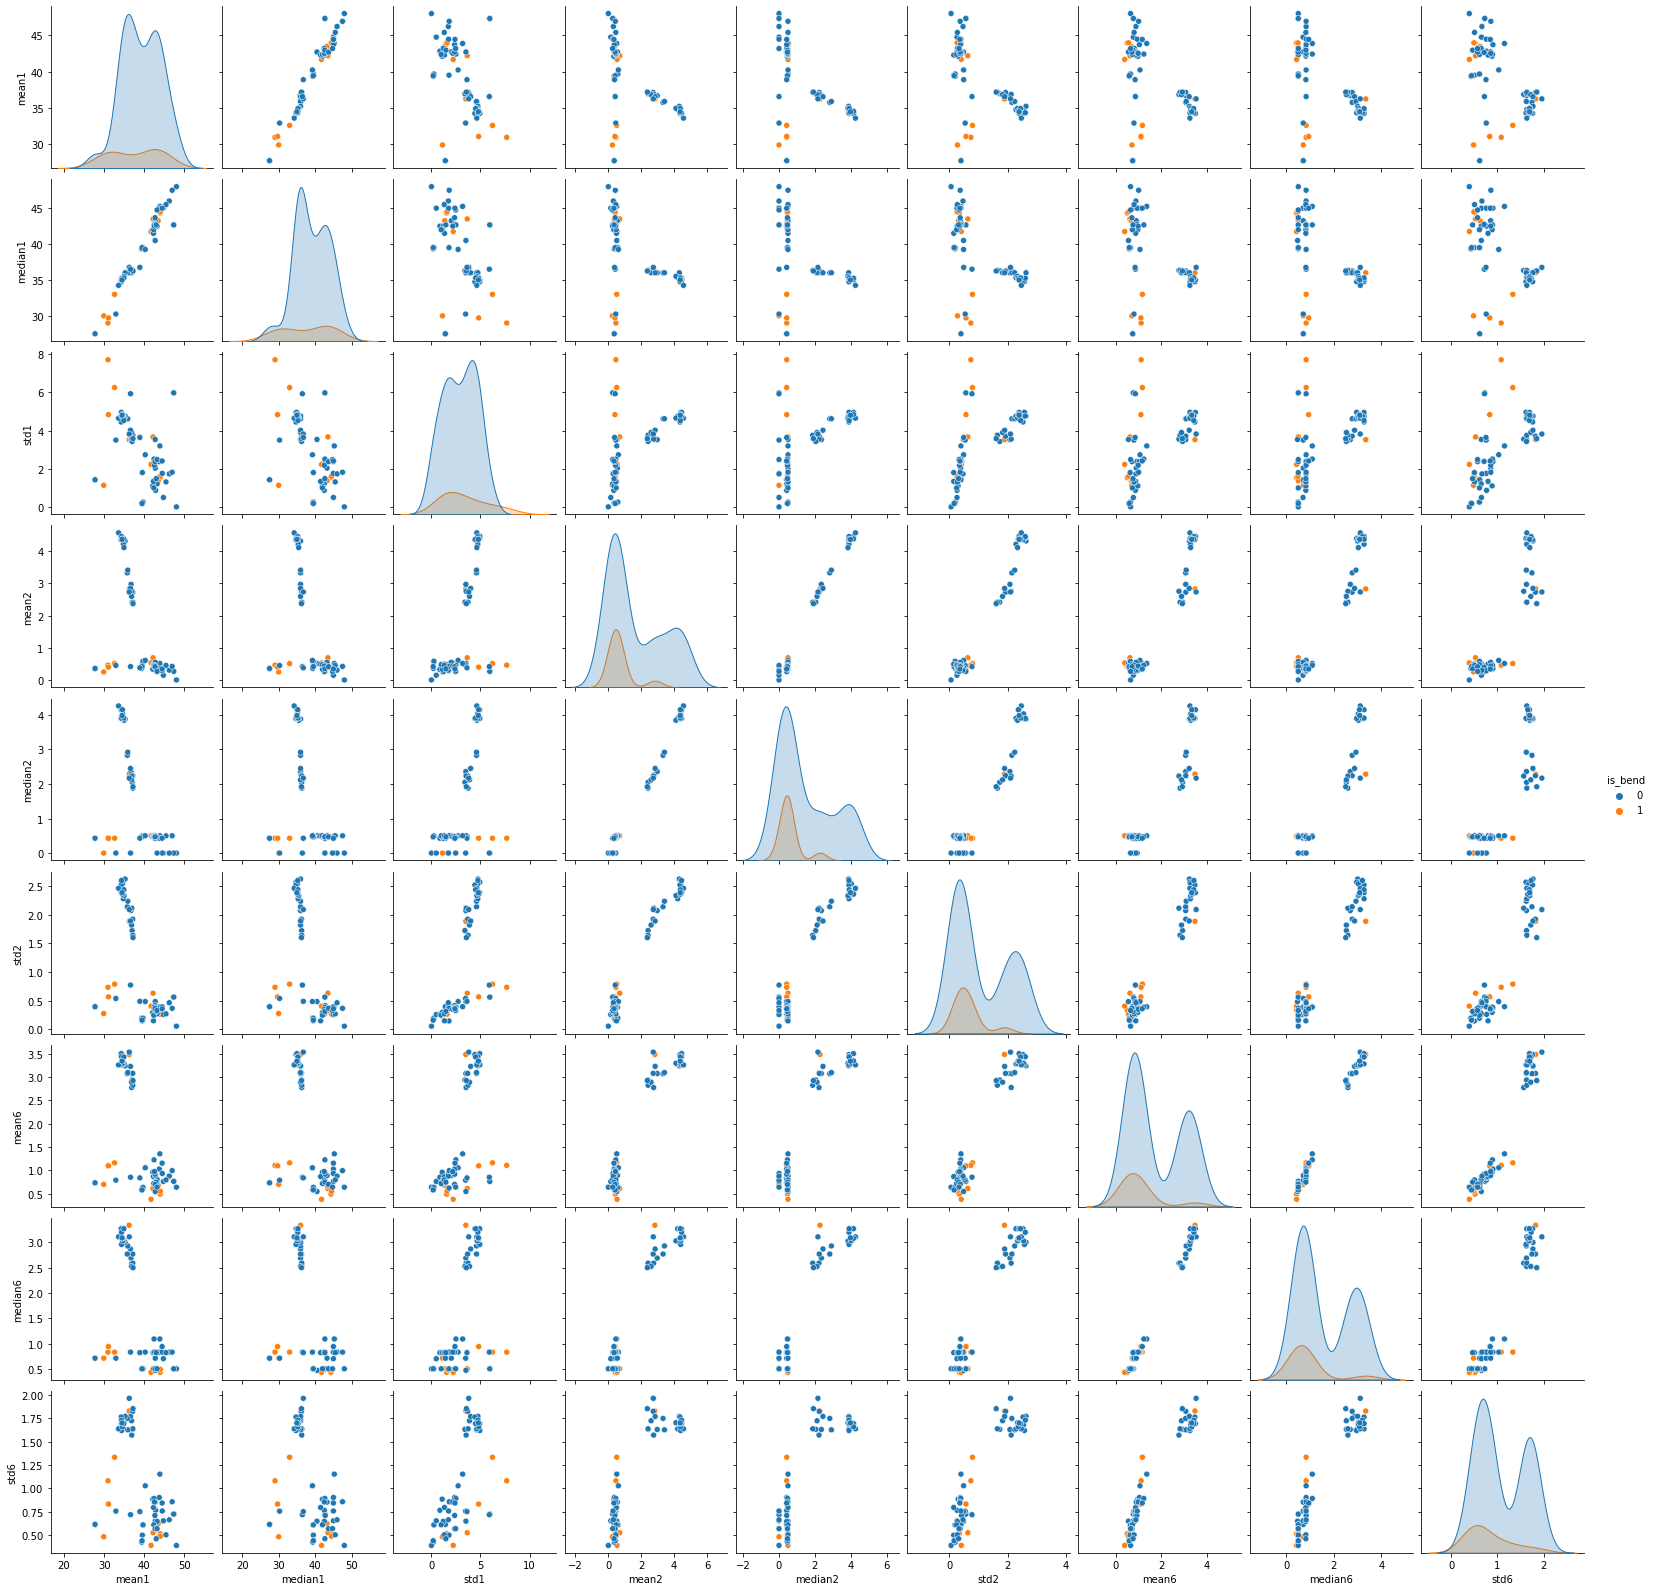

In [33]:
pairplot_fig=sns.pairplot(df_train_ex,vars=['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6'],hue='is_bend')
#plt.subplots_adjust(top=0.5)

### ii

In [34]:
df_train

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      34.50       6.18       9.00       3.56      12.67   
476           119000      25.75       6.02      13.75       2.05      16.00   
477           119250      31.50       3.35      10.25       5.12      16.25   
478           119500      33.75       2.77      14.00       3.24      13.75   
479           119750      37.00       1.41      18.25       3.70      11.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       4.19  
476       1.58  
477       2.95  
478       0.43  
479       4.32  

[33120 rows x 7 columns]

In [35]:
# bend1
df_train=pd.DataFrame()
df_train_2=pd.DataFrame()
train_bend1_3=pd.read_csv('..\\data\\bending1\\dataset3.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend1_3))
train_bend1_4=pd.read_csv('..\\data\\bending1\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend1_4))
train_bend1_5=pd.read_csv('..\\data\\bending1\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend1_5))
train_bend1_6=pd.read_csv('..\\data\\bending1\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend1_6))
train_bend1_7=pd.read_csv('..\\data\\bending1\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend1_7))

train_bend1_3=pd.read_csv('..\\data\\bending1\\dataset3.csv',skiprows=4)
train_bend1_3=train_bend1_3.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend1_3))
train_bend1_4=pd.read_csv('..\\data\\bending1\\dataset4.csv',skiprows=4)
train_bend1_4=train_bend1_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend1_4))
train_bend1_5=pd.read_csv('..\\data\\bending1\\dataset5.csv',skiprows=4)
train_bend1_5=train_bend1_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend1_5))
train_bend1_6=pd.read_csv('..\\data\\bending1\\dataset6.csv',skiprows=4)
train_bend1_6=train_bend1_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend1_6))
train_bend1_7=pd.read_csv('..\\data\\bending1\\dataset7.csv',skiprows=4)
train_bend1_7=train_bend1_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend1_7))
#bend2
train_bend2_3=pd.read_csv('..\\data\\bending2\\dataset3.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend2_3))
train_bend2_4=pd.read_csv('..\\data\\bending2\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend2_4))
train_bend2_5=pd.read_csv('..\\data\\bending2\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend2_5))
train_bend2_6=pd.read_csv('..\\data\\bending2\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_bend2_6))

train_bend2_3=pd.read_csv('..\\data\\bending2\\dataset3.csv',skiprows=4)
train_bend2_3=train_bend2_3.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend2_3))
train_bend2_4=pd.read_csv('..\\data\\bending2\\dataset4.csv',skiprows=4)
train_bend2_4=train_bend2_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend2_4))
train_bend2_5=pd.read_csv('..\\data\\bending2\\dataset5.csv',skiprows=4)
train_bend2_5=train_bend2_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend2_5))
train_bend2_6=pd.read_csv('..\\data\\bending2\\dataset6.csv',skiprows=4)
train_bend2_6=train_bend2_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_bend2_6))
#cycling
train_cycling_4=pd.read_csv('..\\data\\cycling\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_4))
train_cycling_5=pd.read_csv('..\\data\\cycling\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_5))
train_cycling_6=pd.read_csv('..\\data\\cycling\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_6))
train_cycling_7=pd.read_csv('..\\data\\cycling\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_7))
train_cycling_8=pd.read_csv('..\\data\\cycling\\dataset8.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_8))
train_cycling_9=pd.read_csv('..\\data\\cycling\\dataset9.csv',skiprows=4,nrows=240,usecols = [i for i in range(7)])
df_train=df_train.append(pd.DataFrame(train_cycling_9))
train_cycling_10=pd.read_csv('..\\data\\cycling\\dataset10.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_10))
train_cycling_11=pd.read_csv('..\\data\\cycling\\dataset11.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_11))
train_cycling_12=pd.read_csv('..\\data\\cycling\\dataset12.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_12))
train_cycling_13=pd.read_csv('..\\data\\cycling\\dataset13.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_13))
train_cycling_14=pd.read_csv('..\\data\\cycling\\dataset14.csv',skiprows=4,nrows=240,usecols = [i for i in range(7)])
df_train=df_train.append(pd.DataFrame(train_cycling_14))
train_cycling_15=pd.read_csv('..\\data\\cycling\\dataset15.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_cycling_15))

train_cycling_4=pd.read_csv('..\\data\\cycling\\dataset4.csv',skiprows=4)
train_cycling_4=train_cycling_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_4))
train_cycling_5=pd.read_csv('..\\data\\cycling\\dataset5.csv',skiprows=4)
train_cycling_5=train_cycling_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_5))
train_cycling_6=pd.read_csv('..\\data\\cycling\\dataset6.csv',skiprows=4)
train_cycling_6=train_cycling_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_6))
train_cycling_7=pd.read_csv('..\\data\\cycling\\dataset7.csv',skiprows=4)
train_cycling_7=train_cycling_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_7))
train_cycling_8=pd.read_csv('..\\data\\cycling\\dataset8.csv',skiprows=4)
train_cycling_8=train_cycling_8.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_8))
train_cycling_9=pd.read_csv('..\\data\\cycling\\dataset9.csv',skiprows=4,usecols = [i for i in range(7)])
train_cycling_9=train_cycling_9.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_9))
train_cycling_10=pd.read_csv('..\\data\\cycling\\dataset10.csv',skiprows=4)
train_cycling_10=train_cycling_10.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_10))
train_cycling_11=pd.read_csv('..\\data\\cycling\\dataset11.csv',skiprows=4)
train_cycling_11=train_cycling_11.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_11))
train_cycling_12=pd.read_csv('..\\data\\cycling\\dataset12.csv',skiprows=4)
train_cycling_12=train_cycling_12.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_12))
train_cycling_13=pd.read_csv('..\\data\\cycling\\dataset13.csv',skiprows=4)
train_cycling_13=train_cycling_13.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_13))
train_cycling_14=pd.read_csv('..\\data\\cycling\\dataset14.csv',skiprows=4,usecols = [i for i in range(7)])
train_cycling_14=train_cycling_14.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_14))
train_cycling_15=pd.read_csv('..\\data\\cycling\\dataset15.csv',skiprows=4)
train_cycling_15=train_cycling_15.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_cycling_15))
# lying
train_lying_4=pd.read_csv('..\\data\\lying\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_4))
train_lying_5=pd.read_csv('..\\data\\lying\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_5))
train_lying_6=pd.read_csv('..\\data\\lying\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_6))
train_lying_7=pd.read_csv('..\\data\\lying\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_7))
train_lying_8=pd.read_csv('..\\data\\lying\\dataset8.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_8))
train_lying_9=pd.read_csv('..\\data\\lying\\dataset9.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_9))
train_lying_10=pd.read_csv('..\\data\\lying\\dataset10.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_10))
train_lying_11=pd.read_csv('..\\data\\lying\\dataset11.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_11))
train_lying_12=pd.read_csv('..\\data\\lying\\dataset12.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_12))
train_lying_13=pd.read_csv('..\\data\\lying\\dataset13.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_13))
train_lying_14=pd.read_csv('..\\data\\lying\\dataset14.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_14))
train_lying_15=pd.read_csv('..\\data\\lying\\dataset15.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_lying_15))

train_lying_4=pd.read_csv('..\\data\\lying\\dataset4.csv',skiprows=4)
train_lying_4=train_lying_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_4))
train_lying_5=pd.read_csv('..\\data\\lying\\dataset5.csv',skiprows=4)
train_lying_5=train_lying_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_5))
train_lying_6=pd.read_csv('..\\data\\lying\\dataset6.csv',skiprows=4)
train_lying_6=train_lying_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_6))
train_lying_7=pd.read_csv('..\\data\\lying\\dataset7.csv',skiprows=4)
train_lying_7=train_lying_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_7))
train_lying_8=pd.read_csv('..\\data\\lying\\dataset8.csv',skiprows=4)
train_lying_8=train_lying_8.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_8))
train_lying_9=pd.read_csv('..\\data\\lying\\dataset9.csv',skiprows=4)
train_lying_9=train_lying_9.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_9))
train_lying_10=pd.read_csv('..\\data\\lying\\dataset10.csv',skiprows=4)
train_lying_10=train_lying_10.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_10))
train_lying_11=pd.read_csv('..\\data\\lying\\dataset11.csv',skiprows=4)
train_lying_11=train_lying_11.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_11))
train_lying_12=pd.read_csv('..\\data\\lying\\dataset12.csv',skiprows=4)
train_lying_12=train_lying_12.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_12))
train_lying_13=pd.read_csv('..\\data\\lying\\dataset13.csv',skiprows=4)
train_lying_13=train_lying_13.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_13))
train_lying_14=pd.read_csv('..\\data\\lying\\dataset14.csv',skiprows=4)
train_lying_14=train_lying_14.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_14))
train_lying_15=pd.read_csv('..\\data\\lying\\dataset15.csv',skiprows=4)
train_lying_15=train_lying_15.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_lying_15))
#sitting
train_sitting_4=pd.read_csv('..\\data\\sitting\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_4))
train_sitting_5=pd.read_csv('..\\data\\sitting\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_5))
train_sitting_6=pd.read_csv('..\\data\\sitting\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_6))
train_sitting_7=pd.read_csv('..\\data\\sitting\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_7))
train_sitting_8=pd.read_csv('..\\data\\sitting\\dataset8.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_8))
train_sitting_9=pd.read_csv('..\\data\\sitting\\dataset9.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_9))
train_sitting_10=pd.read_csv('..\\data\\sitting\\dataset10.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_10))
train_sitting_11=pd.read_csv('..\\data\\sitting\\dataset11.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_11))
train_sitting_12=pd.read_csv('..\\data\\sitting\\dataset12.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_12))
train_sitting_13=pd.read_csv('..\\data\\sitting\\dataset13.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_13))
train_sitting_14=pd.read_csv('..\\data\\sitting\\dataset14.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_14))
train_sitting_15=pd.read_csv('..\\data\\sitting\\dataset15.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_sitting_15))

train_sitting_4=pd.read_csv('..\\data\\sitting\\dataset4.csv',skiprows=4)
train_sitting_4=train_sitting_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_4))
train_sitting_5=pd.read_csv('..\\data\\sitting\\dataset5.csv',skiprows=4)
train_sitting_5=train_sitting_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_5))
train_sitting_6=pd.read_csv('..\\data\\sitting\\dataset6.csv',skiprows=4)
train_sitting_6=train_sitting_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_6))
train_sitting_7=pd.read_csv('..\\data\\sitting\\dataset7.csv',skiprows=4)
train_sitting_7=train_sitting_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_7))
train_sitting_8=pd.read_csv('..\\data\\sitting\\dataset8.csv',skiprows=4)
train_sitting_8=train_sitting_8.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_8))
train_sitting_9=pd.read_csv('..\\data\\sitting\\dataset9.csv',skiprows=4)
train_sitting_9=train_sitting_9.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_9))
train_sitting_10=pd.read_csv('..\\data\\sitting\\dataset10.csv',skiprows=4)
train_sitting_10=train_sitting_10.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_10))
train_sitting_11=pd.read_csv('..\\data\\sitting\\dataset11.csv',skiprows=4)
train_sitting_11=train_sitting_11.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_11))
train_sitting_12=pd.read_csv('..\\data\\sitting\\dataset12.csv',skiprows=4)
train_sitting_12=train_sitting_12.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_12))
train_sitting_13=pd.read_csv('..\\data\\sitting\\dataset13.csv',skiprows=4)
train_sitting_13=train_sitting_13.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_13))
train_sitting_14=pd.read_csv('..\\data\\sitting\\dataset14.csv',skiprows=4)
train_sitting_14=train_sitting_14.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_14))
train_sitting_15=pd.read_csv('..\\data\\sitting\\dataset15.csv',skiprows=4)
train_sitting_15=train_sitting_15.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_sitting_15))
# standing
train_standing_4=pd.read_csv('..\\data\\standing\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_4))
train_standing_5=pd.read_csv('..\\data\\standing\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_5))
train_standing_6=pd.read_csv('..\\data\\standing\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_6))
train_standing_7=pd.read_csv('..\\data\\standing\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_7))
train_standing_8=pd.read_csv('..\\data\\standing\\dataset8.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_8))
train_standing_9=pd.read_csv('..\\data\\standing\\dataset9.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_9))
train_standing_10=pd.read_csv('..\\data\\standing\\dataset10.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_10))
train_standing_11=pd.read_csv('..\\data\\standing\\dataset11.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_11))
train_standing_12=pd.read_csv('..\\data\\standing\\dataset12.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_12))
train_standing_13=pd.read_csv('..\\data\\standing\\dataset13.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_13))
train_standing_14=pd.read_csv('..\\data\\standing\\dataset14.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_14))
train_standing_15=pd.read_csv('..\\data\\standing\\dataset15.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_standing_15))

train_standing_4=pd.read_csv('..\\data\\standing\\dataset4.csv',skiprows=4)
train_standing_4=train_standing_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_4))
train_standing_5=pd.read_csv('..\\data\\standing\\dataset5.csv',skiprows=4)
train_standing_5=train_standing_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_5))
train_standing_6=pd.read_csv('..\\data\\standing\\dataset6.csv',skiprows=4)
train_standing_6=train_standing_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_6))
train_standing_7=pd.read_csv('..\\data\\standing\\dataset7.csv',skiprows=4)
train_standing_7=train_standing_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_7))
train_standing_8=pd.read_csv('..\\data\\standing\\dataset8.csv',skiprows=4)
train_standing_8=train_standing_8.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_8))
train_standing_9=pd.read_csv('..\\data\\standing\\dataset9.csv',skiprows=4)
train_standing_9=train_standing_9.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_9))
train_standing_10=pd.read_csv('..\\data\\standing\\dataset10.csv',skiprows=4)
train_standing_10=train_standing_10.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_10))
train_standing_11=pd.read_csv('..\\data\\standing\\dataset11.csv',skiprows=4)
train_standing_11=train_standing_11.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_11))
train_standing_12=pd.read_csv('..\\data\\standing\\dataset12.csv',skiprows=4)
train_standing_12=train_standing_12.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_12))
train_standing_13=pd.read_csv('..\\data\\standing\\dataset13.csv',skiprows=4)
train_standing_13=train_standing_13.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_13))
train_standing_14=pd.read_csv('..\\data\\standing\\dataset14.csv',skiprows=4)
train_standing_14=train_standing_14.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_14))
train_standing_15=pd.read_csv('..\\data\\standing\\dataset15.csv',skiprows=4)
train_standing_15=train_standing_15.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_standing_15))
# walking
train_walking_4=pd.read_csv('..\\data\\walking\\dataset4.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_4))
train_walking_5=pd.read_csv('..\\data\\walking\\dataset5.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_5))
train_walking_6=pd.read_csv('..\\data\\walking\\dataset6.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_6))
train_walking_7=pd.read_csv('..\\data\\walking\\dataset7.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_7))
train_walking_8=pd.read_csv('..\\data\\walking\\dataset8.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_8))
train_walking_9=pd.read_csv('..\\data\\walking\\dataset9.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_9))
train_walking_10=pd.read_csv('..\\data\\walking\\dataset10.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_10))
train_walking_11=pd.read_csv('..\\data\\walking\\dataset11.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_11))
train_walking_12=pd.read_csv('..\\data\\walking\\dataset12.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_12))
train_walking_13=pd.read_csv('..\\data\\walking\\dataset13.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_13))
train_walking_14=pd.read_csv('..\\data\\walking\\dataset14.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_14))
train_walking_15=pd.read_csv('..\\data\\walking\\dataset15.csv',skiprows=4,nrows=240)
df_train=df_train.append(pd.DataFrame(train_walking_15))

train_walking_4=pd.read_csv('..\\data\\walking\\dataset4.csv',skiprows=4)
train_walking_4=train_walking_4.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_4))
train_walking_5=pd.read_csv('..\\data\\walking\\dataset5.csv',skiprows=4)
train_walking_5=train_walking_5.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_5))
train_walking_6=pd.read_csv('..\\data\\walking\\dataset6.csv',skiprows=4)
train_walking_6=train_walking_6.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_6))
train_walking_7=pd.read_csv('..\\data\\walking\\dataset7.csv',skiprows=4)
train_walking_7=train_walking_7.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_7))
train_walking_8=pd.read_csv('..\\data\\walking\\dataset8.csv',skiprows=4)
train_walking_8=train_walking_8.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_8))
train_walking_9=pd.read_csv('..\\data\\walking\\dataset9.csv',skiprows=4)
train_walking_9=train_walking_9.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_9))
train_walking_10=pd.read_csv('..\\data\\walking\\dataset10.csv',skiprows=4)
train_walking_10=train_walking_10.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_10))
train_walking_11=pd.read_csv('..\\data\\walking\\dataset11.csv',skiprows=4)
train_walking_11=train_walking_11.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_11))
train_walking_12=pd.read_csv('..\\data\\walking\\dataset12.csv',skiprows=4)
train_walking_12=train_walking_12.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_12))
train_walking_13=pd.read_csv('..\\data\\walking\\dataset13.csv',skiprows=4)
train_walking_13=train_walking_13.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_13))
train_walking_14=pd.read_csv('..\\data\\walking\\dataset14.csv',skiprows=4)
train_walking_14=train_walking_14.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_14))
train_walking_15=pd.read_csv('..\\data\\walking\\dataset15.csv',skiprows=4)
train_walking_15=train_walking_15.tail(240)
df_train_2=df_train_2.append(pd.DataFrame(train_walking_15))

In [36]:
df_train_2

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
240            60000      43.33       0.94      18.00       0.00      35.67   
241            60250      44.20       0.75      19.75       0.83      35.40   
242            60500      45.00       0.00      21.75       0.83      35.00   
243            60750      45.00       0.00      23.33       0.47      36.00   
244            61000      45.00       0.00      24.00       0.00      36.00   
..               ...        ...        ...        ...        ...        ...   
475           118750      34.50       6.18       9.00       3.56      12.67   
476           119000      25.75       6.02      13.75       2.05      16.00   
477           119250      31.50       3.35      10.25       5.12      16.25   
478           119500      33.75       2.77      14.00       3.24      13.75   
479           119750      37.00       1.41      18.25       3.70      11.00   

     var_rss23  
240       0.47  
241       1.20  
242       1.41  
243       0.00  
244       0.00  
..         ...  
475       4.19  
476       1.58  
477       2.95  
478       0.43  
479       4.32  

[16560 rows x 7 columns]

In [37]:
df_for2=pd.DataFrame()
for x in range(69):
    mean1=df_train.iloc[(240*x):(240*x+240),1].mean()
    median1=df_train.iloc[(240*x):(240*x+240),1].median()
    std1=df_train.iloc[(240*x):(240*x+240),1].std()
    mean2=df_train.iloc[(240*x):(240*x+240),2].mean()
    median2=df_train.iloc[(240*x):(240*x+240),2].median()
    std2=df_train.iloc[(240*x):(240*x+240),2].std()
    mean6=df_train.iloc[(240*x):(240*x+240),6].mean()
    median6=df_train.iloc[(240*x):(240*x+240),6].median()
    std6=df_train.iloc[(240*x):(240*x+240),6].std()
    df_for2=df_for2.append(pd.DataFrame([[mean1,median1,std1,mean2,median2,std2,mean6,median6,std6]]),ignore_index=True)

In [38]:
df_for2.columns=['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6']
df_for2

mean1  median1      std1     mean2  median2      std2     mean6  \
0   44.057167   44.500  1.556971  0.381042    0.470  0.329540  0.598250   
1   43.278875   45.000  3.473355  0.673292    0.485  0.634285  0.640958   
2   41.621208   42.330  3.118644  0.623083    0.500  0.489595  0.419083   
3   44.117042   45.000  1.359836  0.250042    0.000  0.314099  0.815417   
4   43.486208   43.710  1.281976  0.378667    0.470  0.284434  0.524875   
..        ...      ...       ...       ...      ...       ...       ...   
64  33.334500   34.000  4.874433  4.408083    4.195  2.196206  3.229167   
65  34.036750   34.415  4.872880  4.778292    4.030  2.762730  3.543708   
66  34.033875   35.000  4.758757  4.574625    4.470  2.391804  3.244042   
67  34.920792   35.330  4.272282  4.177958    3.865  2.341763  3.430625   
68  34.916792   35.375  4.634209  4.262333    3.850  2.396878  3.439917   

    median6      std6  
0     0.500  0.526656  
1     0.765  0.554542  
2     0.430  0.411200  
3     0.710  0.718016  
4     0.470  0.486847  
..      ...       ...  
64    3.110  1.637310  
65    3.255  1.703098  
66    2.980  1.619767  
67    3.270  1.781928  
68    3.200  1.737420  

[69 rows x 9 columns]

In [39]:
df_for2_2=pd.DataFrame()
for x in range(69):
    mean7=df_train_2.iloc[(240*x):(240*x+240),1].mean()
    median7=df_train_2.iloc[(240*x):(240*x+240),1].median()
    std7=df_train_2.iloc[(240*x):(240*x+240),1].std()
    mean8=df_train_2.iloc[(240*x):(240*x+240),2].mean()
    median8=df_train_2.iloc[(240*x):(240*x+240),2].median()
    std8=df_train_2.iloc[(240*x):(240*x+240),2].std()
    mean12=df_train_2.iloc[(240*x):(240*x+240),6].mean()
    median12=df_train_2.iloc[(240*x):(240*x+240),6].median()
    std12=df_train_2.iloc[(240*x):(240*x+240),6].std()
    df_for2_2=df_for2_2.append(pd.DataFrame([[mean7,median7,std7,mean8,median8,std8,mean12,median12,std12]]),ignore_index=True)

In [40]:
df_for2_2.columns=['mean7','median7','std7','mean8','median8','std8','mean12','median12','std12']
df_for2_2

mean7  median7      std7     mean8  median8      std8    mean12  \
0   43.851833   43.500  1.557168  0.471458    0.500  0.342346  0.388333   
1   41.080750   42.000  3.537481  0.718792    0.500  0.627915  0.586083   
2   41.734917   41.500  0.595920  0.448875    0.500  0.273050  0.347500   
3   42.792875   42.670  1.058792  0.506125    0.500  0.260761  0.543875   
4   44.452042   44.500  1.771251  0.447583    0.500  0.235493  0.585750   
..        ...      ...       ...       ...      ...       ...       ...   
64  33.839250   34.500  4.411903  4.745042    4.320  2.694219  3.290292   
65  34.608750   35.500  4.621400  4.134375    3.740  2.387460  3.321417   
66  35.058583   35.875  4.880650  4.169292    3.880  2.315929  3.432208   
67  34.825667   35.250  4.785599  4.583208    4.070  2.514203  3.418667   
68  34.029583   34.500  4.923609  4.456292    4.195  2.381634  3.241000   

    median12     std12  
0      0.000  0.478528  
1      0.470  0.491873  
2      0.430  0.363144  
3      0.500  0.473445  
4      0.500  0.487918  
..       ...       ...  
64     3.155  1.646023  
65     3.155  1.758379  
66     3.255  1.691050  
67     3.350  1.598536  
68     3.060  1.657578  

[69 rows x 9 columns]

In [41]:
df_for2_f=pd.concat([df_for2,df_for2_2],axis=1)
df_for2_f.index = np.arange(1,70)
df_for2_f['is_bend']=0


In [42]:
for i in df_for2_f.index:
    if i<10:
        df_for2_f.loc[i,'is_bend']=1
   # else:
    #df_for2_f['is_bend'][i]=2


In [43]:
df_for2_f

mean1  median1      std1     mean2  median2      std2     mean6  \
1   44.057167   44.500  1.556971  0.381042    0.470  0.329540  0.598250   
2   43.278875   45.000  3.473355  0.673292    0.485  0.634285  0.640958   
3   41.621208   42.330  3.118644  0.623083    0.500  0.489595  0.419083   
4   44.117042   45.000  1.359836  0.250042    0.000  0.314099  0.815417   
5   43.486208   43.710  1.281976  0.378667    0.470  0.284434  0.524875   
..        ...      ...       ...       ...      ...       ...       ...   
65  33.334500   34.000  4.874433  4.408083    4.195  2.196206  3.229167   
66  34.036750   34.415  4.872880  4.778292    4.030  2.762730  3.543708   
67  34.033875   35.000  4.758757  4.574625    4.470  2.391804  3.244042   
68  34.920792   35.330  4.272282  4.177958    3.865  2.341763  3.430625   
69  34.916792   35.375  4.634209  4.262333    3.850  2.396878  3.439917   

    median6      std6      mean7  median7      std7     mean8  median8  \
1     0.500  0.526656  43.851833   43.500  1.557168  0.471458    0.500   
2     0.765  0.554542  41.080750   42.000  3.537481  0.718792    0.500   
3     0.430  0.411200  41.734917   41.500  0.595920  0.448875    0.500   
4     0.710  0.718016  42.792875   42.670  1.058792  0.506125    0.500   
5     0.470  0.486847  44.452042   44.500  1.771251  0.447583    0.500   
..      ...       ...        ...      ...       ...       ...      ...   
65    3.110  1.637310  33.839250   34.500  4.411903  4.745042    4.320   
66    3.255  1.703098  34.608750   35.500  4.621400  4.134375    3.740   
67    2.980  1.619767  35.058583   35.875  4.880650  4.169292    3.880   
68    3.270  1.781928  34.825667   35.250  4.785599  4.583208    4.070   
69    3.200  1.737420  34.029583   34.500  4.923609  4.456292    4.195   

        std8    mean12  median12     std12  is_bend  
1   0.342346  0.388333     0.000  0.478528        1  
2   0.627915  0.586083     0.470  0.491873        1  
3   0.273050  0.347500     0.430  0.363144        1  
4   0.260761  0.543875     0.500  0.473445        1  
5   0.235493  0.585750     0.500  0.487918        1  
..       ...       ...       ...       ...      ...  
65  2.694219  3.290292     3.155  1.646023        0  
66  2.387460  3.321417     3.155  1.758379        0  
67  2.315929  3.432208     3.255  1.691050        0  
68  2.514203  3.418667     3.350  1.598536        0  
69  2.381634  3.241000     3.060  1.657578        0  

[69 rows x 19 columns]

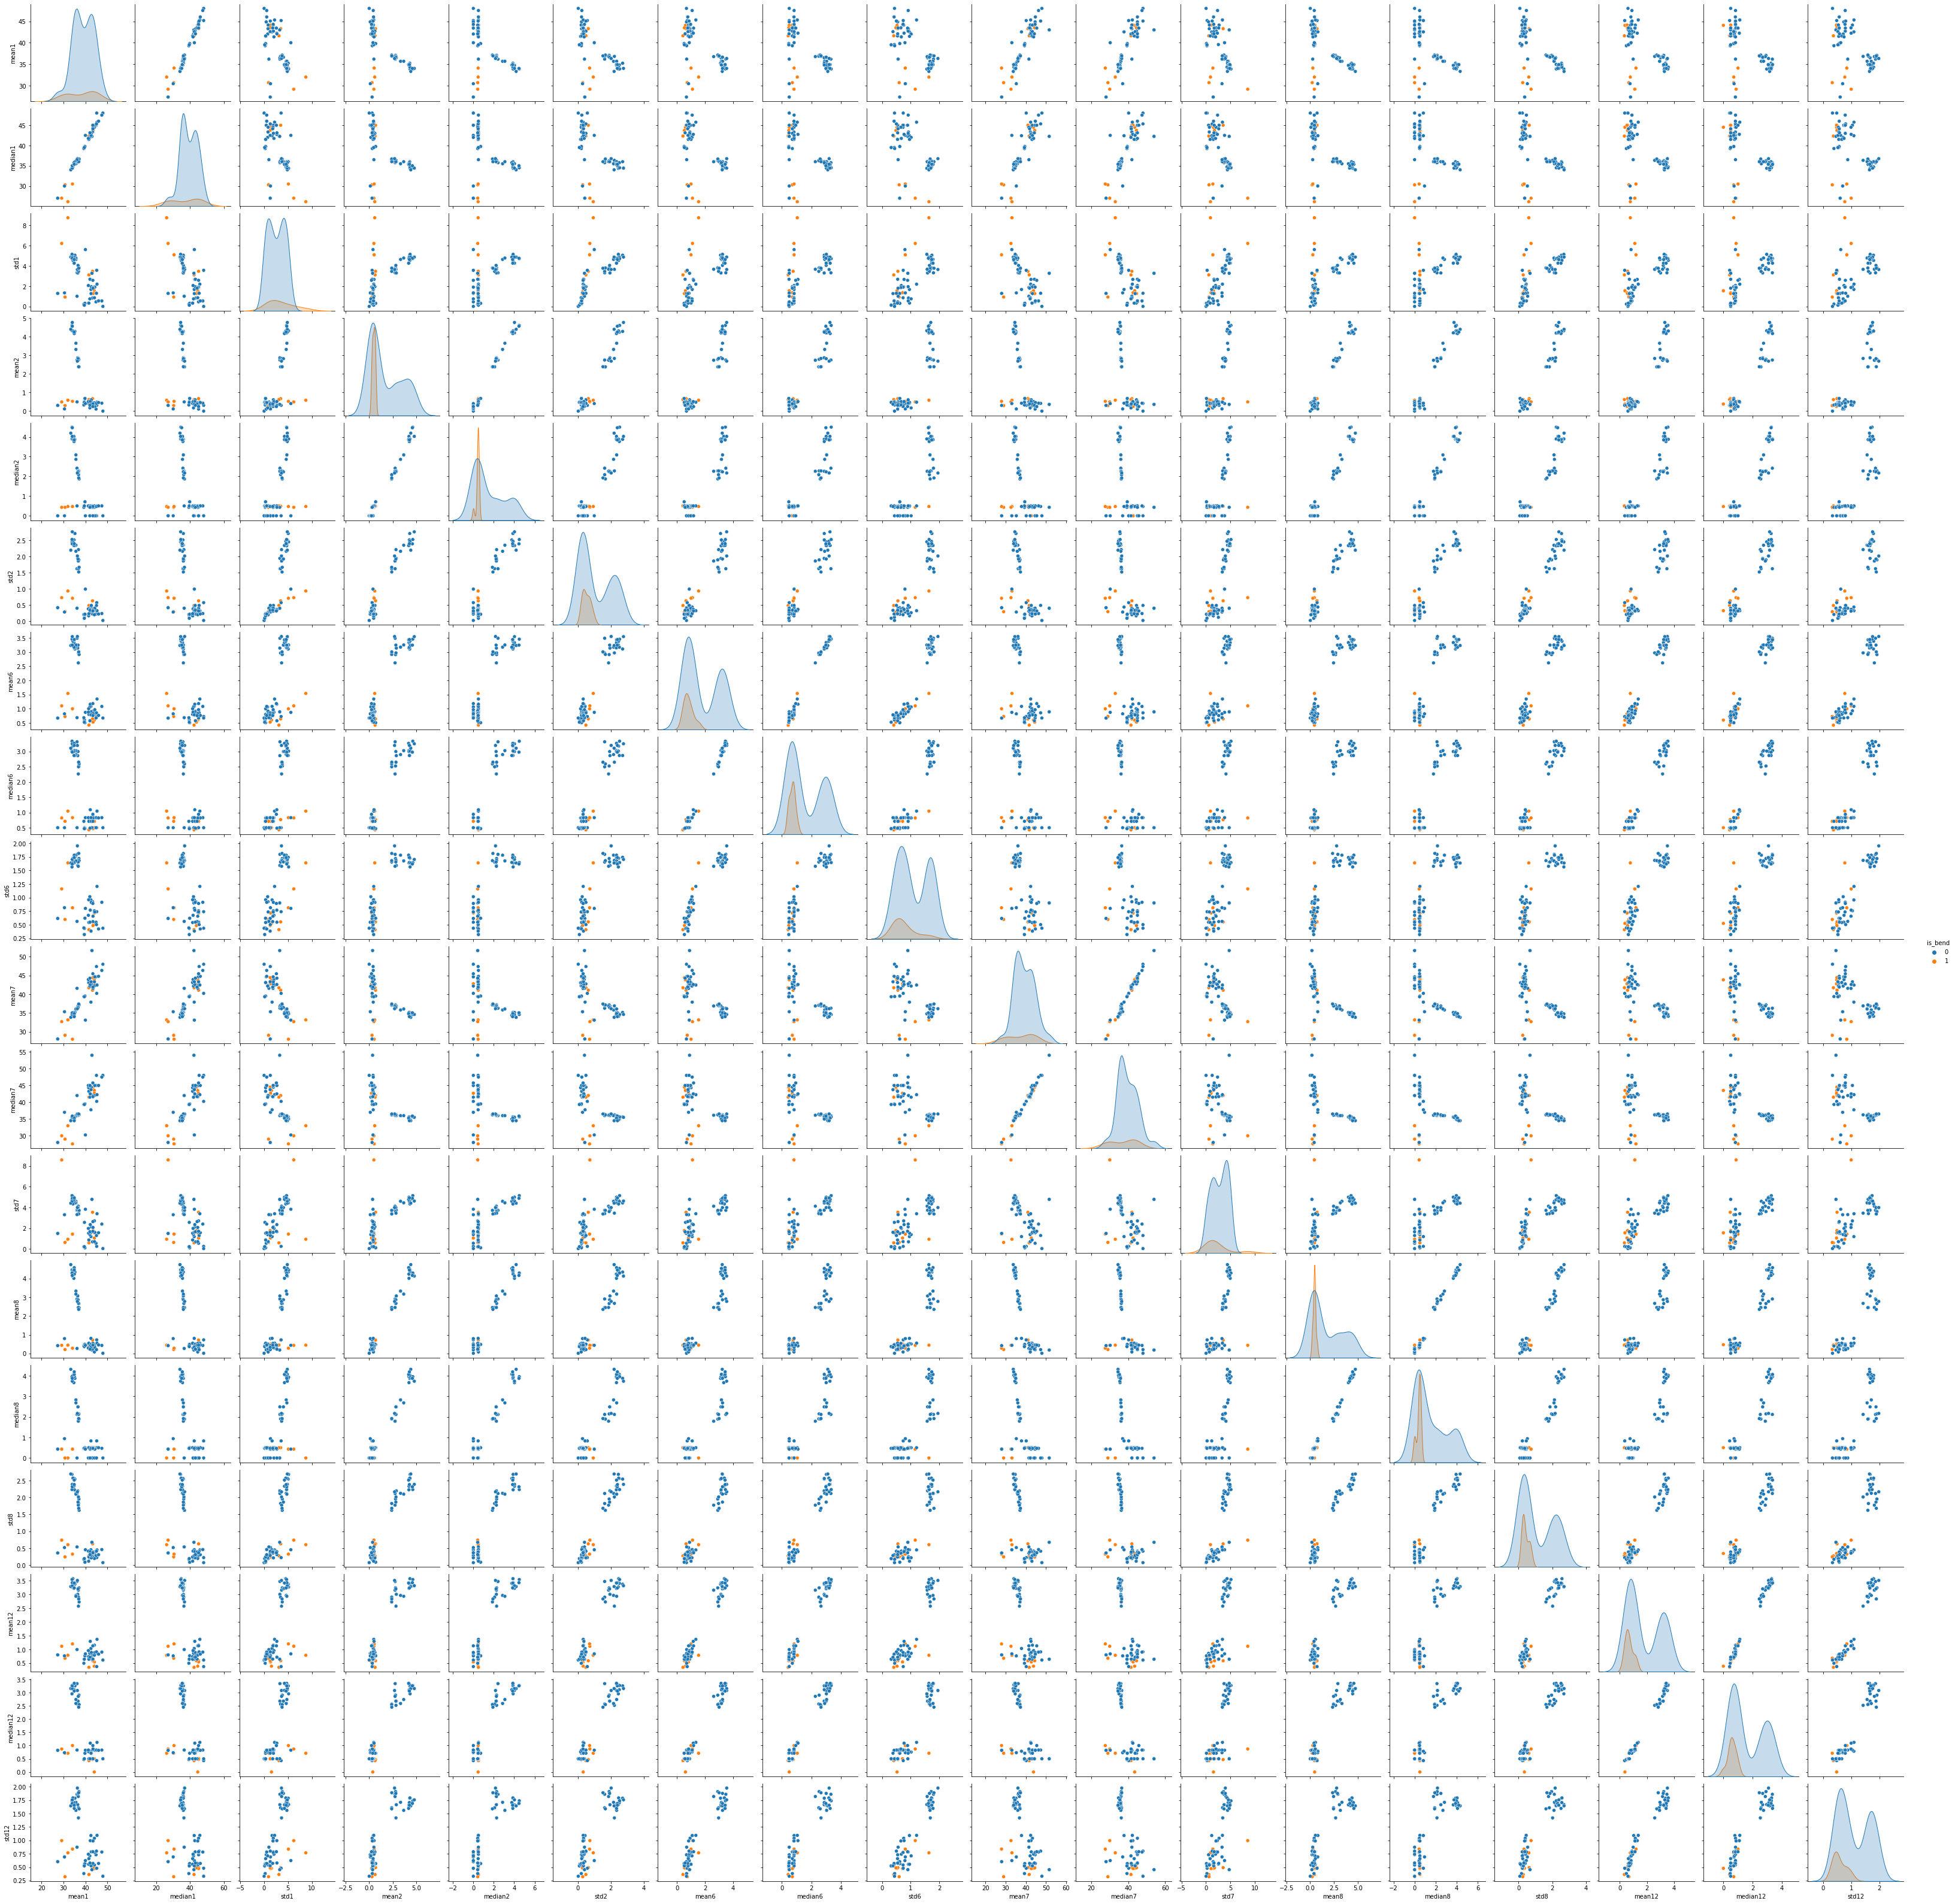

In [44]:
pairplot_fig=sns.pairplot(df_for2_f,vars=['mean1','median1','std1','mean2','median2','std2','mean6','median6','std6','mean7','median7','std7','mean8','median8','std8','mean12','median12','std12'],hue='is_bend')

### From the plot I do not see considerable changes.

### iii 

In [45]:

index=df_training.index
num_index=len(index)


df_training

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                  0      42.00       0.71      21.25       0.43      30.00   
1                250      41.50       0.50      20.25       1.48      31.25   
2                500      41.50       0.50      14.25       1.92      33.00   
3                750      40.75       0.83      15.75       0.43      33.00   
4               1000      40.00       0.71      20.00       2.74      32.75   
..               ...        ...        ...        ...        ...        ...   
475           118750      34.50       6.18       9.00       3.56      12.67   
476           119000      25.75       6.02      13.75       2.05      16.00   
477           119250      31.50       3.35      10.25       5.12      16.25   
478           119500      33.75       2.77      14.00       3.24      13.75   
479           119750      37.00       1.41      18.25       3.70      11.00   

     var_rss23  
0         0.00  
1         1.09  
2         0.00  
3         0.00  
4         0.43  
..         ...  
475       4.19  
476       1.58  
477       2.95  
478       0.43  
479       4.32  

[33120 rows x 7 columns]

In [46]:
df_training.iloc[:round(num_index/2),1]
num_index

33120

In [47]:


accuracy=pd.DataFrame()
#model=LogisticRegression(solver='liblinear', C=sys.maxsize)
#RFECV_model = RFECV(estimator=model, cv=StratifiedKFold(5))


for l in range(1,21):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    x=df_sum.iloc[:,:-1]
    y=df_sum.iloc[:,-1]
    
    
    
    model=LogisticRegression(solver = 'liblinear', random_state =42,max_iter=5000)
    acc=[]
    
    rfe=RFECV(model,cv= StratifiedKFold(5),min_features_to_select=1)
    rfe=rfe.fit(x,y)
    y_pred=rfe.predict(x) 
    acc_score=sum(y_pred==y)/len(y_pred)
    acc.append([l,rfe.n_features_,acc_score])
    acc=pd.DataFrame(acc)
    acc=acc[acc[2]==max(acc[2])]
    accuracy=accuracy.append(acc)



    


In [48]:
accuracy.index=np.arange(1,len(accuracy)+1)
accuracy.columns=['l','num_feat','accuracy']
accuracy

l  num_feat  accuracy
1    1         6  0.985507
2    2         6  0.963768
3    3         4  0.922705
4    4         4  0.931159
5    5         8  0.933333
6    6        10  0.946860
7    7         5  0.927536
8    8        10  0.956522
9    9         9  0.951691
10  10        11  0.947826
11  11         9  0.948617
12  12         8  0.945652
13  13         7  0.929766
14  14        11  0.946170
15  15        10  0.942995
16  16        10  0.945652
17  17        11  0.940324
18  18         8  0.933977
19  19        10  0.945843
20  20        10  0.945652

In [49]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.124725
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                is_bend   No. Observations:                 1380
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           17
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.6779
Time:                        12:07:01   Log-Likelihood:                -172.12
converged:                       True   LL-Null:                       -534.35
Covariance Type:            nonrobust   LLR p-value:                5.479e-143
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean_1        -0.3791      0.243     -1.562      0.118      -0.855       0.097
median_1       0.1166      0

### iv

### Based on previous question, l=1 and num_feat=6 is chosen for this problem 


In [50]:
accuracy=pd.DataFrame()

for l in range(1,2):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    x=df_sum.iloc[:,:-1]
    y=df_sum.iloc[:,-1]
    
    
    model=LogisticRegression(solver = 'liblinear', random_state =42,max_iter=5000)
    acc=[]
    for num_feat in range(6,7):
        rfe=RFECV(model,cv= StratifiedKFold(5))
        rfe=rfe.fit(x,y)
        y_pred=rfe.predict(x)
        acc_score=sum(y_pred==y)/len(y_pred)
        acc.append([l,num_feat,acc_score])
    acc=pd.DataFrame(acc)
    acc=acc[acc[2]==max(acc[2])]
    accuracy=accuracy.append(acc)

In [51]:
df_rfe=pd.DataFrame([rfe.ranking_])
df_rfe.columns=columns
df_rfe

mean_1  median_1  std_1  mean_2  median_2  std_2  mean_3  median_3  std_3  \
0       1         9     11       1        12      5       3         2      6   

   mean_4  median_4  std_4  mean_5  median_5  std_5  mean_6  median_6  std_6  
0       7         4     13       1        10      1       1         1      8

In [52]:
feature_selected=['mean_1','mean_2','mean_5','std_5','mean_6','median_6']
feature_selected

['mean_1', 'mean_2', 'mean_5', 'std_5', 'mean_6', 'median_6']

In [53]:
# confusion matrix
confusion_matrix(y_pred,y)

array([[59,  0],
       [ 1,  9]], dtype=int64)

Logistic: ROC AUC=0.994


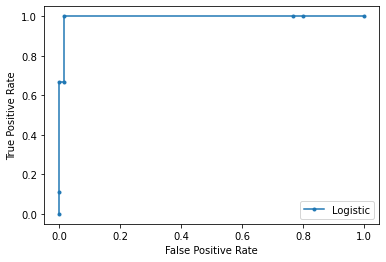

In [54]:
lr_probs = rfe.predict_proba(x)

lr_probs = lr_probs[:, 1]

lr_auc = roc_auc_score(y, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [55]:
x_1 = sm.add_constant(df_sum[feature_selected])
logit_model  = sm.Logit(df_sum['is_bend'],df_sum[feature_selected])
result = logit_model.fit(method='cg')
print(result.summary())



         Current function value: 0.041204
         Iterations: 35
         Function evaluations: 90
         Gradient evaluations: 87
                           Logit Regression Results                           
Dep. Variable:                is_bend   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.8936
Time:                        12:07:01   Log-Likelihood:                -2.8431
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.996e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean_1        -0.6081      0.329     -1.847      0.065      -1.253       0.0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### v

In [56]:
df=df.iloc[:19,:]
df=df.drop(['min1','max1','1st_quart1','3rd_quart1','min2','max2','1st_quart2','3rd_quart2','min3','max3','1st_quart3','3rd_quart3','min4','max4','1st_quart4','3rd_quart4','min5','max5','1st_quart5','3rd_quart5','min6','max6','1st_quart6','3rd_quart6'],axis=1)

df['is_bend']=0
for i in df.index:
        if i<=(4):
            df.loc[i,'is_bend']=1


In [57]:
x_test=df.iloc[:,:18]
x_test.columns=columns
#x_test=x_test[feature_selected]
y_test=df.iloc[:,18]

In [58]:
y_pred=rfe.predict(x_test)
acc_score=sum(y_pred==y_test)/len(y_pred)
print(f'Accuracy of the testing set is {acc_score}')

Accuracy of the testing set is 0.7368421052631579


### The accuracy score for the testing set dropped a bit, but overall remains high accuracy

### vi

In [59]:
x_1 = sm.add_constant(df_sum[feature_selected])
log  = sm.Logit(df_sum['is_bend'],x_1)
res = log.fit(method='cg')
print(res.summary())

         Current function value: 0.035008
         Iterations: 35
         Function evaluations: 91
         Gradient evaluations: 88
                           Logit Regression Results                           
Dep. Variable:                is_bend   No. Observations:                   69
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                  0.9096
Time:                        12:07:24   Log-Likelihood:                -2.4156
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 8.947e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5620     37.058     -0.096      0.923     -76.195      69.0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### The boundary for 95% confidence interval is quite widely separated for most variables. This indicates instability in calculating logistic regression parameters

### vii

In [63]:
confusion_matrix(y_pred,y_test)

array([[10,  0],
       [ 5,  4]], dtype=int64)

#### Imbalance seen in the class

In [64]:
is_bend=df_sum[df_sum['is_bend']==1]
not_bend=df_sum[df_sum['is_bend']==0]

In [65]:
X=df_sum.drop('is_bend',axis=1)
y=df_sum['is_bend']



In [66]:
ros=RandomOverSampler(random_state=10)
X_resampled,y_resampled=ros.fit_resample(X,y)


In [67]:
accuracy=pd.DataFrame()
    
model=LogisticRegression(solver = 'liblinear', random_state =42)
acc=[]
for num_feat in range(6,7):
    rfe=RFECV(model,cv= StratifiedKFold(5))
    rfe=rfe.fit(X_resampled,y_resampled)
    y_pred=rfe.predict(X_resampled)
    acc_score=sum(y_pred==y_resampled)/len(y_resampled)
    acc.append([1,num_feat,acc_score])
acc=pd.DataFrame(acc)
acc=acc[acc[2]==max(acc[2])]
accuracy=accuracy.append(acc)
accuracy.columns=['l','num_feat','accuracy']
print(accuracy)

   l  num_feat  accuracy
0  1         6  0.991667


In [68]:
confusion_matrix(y_pred,y_resampled)

array([[59,  0],
       [ 1, 60]], dtype=int64)

Logistic: ROC AUC=1.000


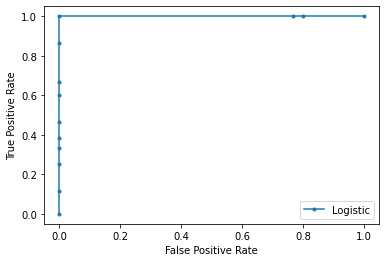

In [69]:
lr_probs = rfe.predict_proba(X_resampled)

lr_probs = lr_probs[:, 1]

lr_auc = roc_auc_score(y_resampled, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_resampled, lr_probs)

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

### (b)

In [70]:
accuracy=[]
accuracy=pd.DataFrame(accuracy)
sc=StandardScaler()


for l in range(1,21):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    x=df_sum.iloc[:,:-1]
    y=df_sum.iloc[:,-1]
    
#    X_train, X_test, y_train, y_test=train_test_split(x,y,random_state=101)
    X_train_std = sc.fit_transform(x)
    X_test_std = sc.transform(x)
    
    acc_list=[]
    model_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear',random_state=70,cv=5,max_iter=5000)
    model_l1.fit(X_train_std, y)
    y_pred=model_l1.predict(X_test_std)
    acc_score=sum(y_pred==y)/len(y_pred)
    acc_list.append([l,acc_score])
    acc_list=pd.DataFrame(acc_list)
    accuracy=accuracy.append(acc_list)
    
    


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
accuracy.columns=['l','accuracy']
accuracy.index=np.arange(1,len(accuracy)+1)
accuracy

l  accuracy
1    1  0.956522
2    2  0.971014
3    3  0.951691
4    4  0.952899
5    5  0.918841
6    6  0.920290
7    7  0.919255
8    8  0.920290
9    9  0.925926
10  10  0.950725
11  11  0.927536
12  12  0.943237
13  13  0.928651
14  14  0.939959
15  15  0.943961
16  16  0.941123
17  17  0.940324
18  18  0.943639
19  19  0.944317
20  20  0.943478

### ii

#### L1-penalized logistic regression is easier to implement, while variable selection methods gave higher accuracy 

### C

### i (add ROC)

In [72]:
accuracy=[]
accuracy=pd.DataFrame(accuracy)


# training set
for l in range(1,21):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    X_train=df_sum.iloc[:,:-1]
    y_train=df_sum.iloc[:,-1]
    
    
# testing set
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,20):
        df_testing_part=df_test.iloc[480*(x-1):480*x+1]
        index=df_testing_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6)
    df_sum_test=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum_test.columns=columns
    df_sum_test.index = np.arange(1,19*l+1)
    df_sum_test['is_bend']=0
    for i in df_sum_test.index:
        if i<=(l*4):
            df_sum_test.loc[i,'is_bend']=1
    X_test=df_sum_test.iloc[:,:-1]
    y_test=df_sum_test.iloc[:,-1]
    
# run model
    X_train_norm=sc.fit_transform(X_train)
    X_test_norm=sc.transform(X_test)
    
    acc_list=[]
    model_multi=LogisticRegressionCV(penalty='l1',solver='saga',cv=5,random_state=70,multi_class='multinomial',max_iter=5000)
    multi=model_multi.fit(X_train_norm,y_train)
    y_pred=multi.predict(X_test_norm)
    acc_score=sum(y_pred==y_test)/len(y_pred)
    test_error=1-acc_score
    acc_list.append([l,test_error])
    acc_list=pd.DataFrame(acc_list)
    accuracy=accuracy.append(acc_list)


In [73]:
accuracy.columns=['l','test error']
accuracy.index=np.arange(1,len(accuracy)+1)
accuracy

l  test error
1    1    0.000000
2    2    0.000000
3    3    0.000000
4    4    0.000000
5    5    0.010526
6    6    0.008772
7    7    0.007519
8    8    0.006579
9    9    0.040936
10  10    0.010526
11  11    0.004785
12  12    0.013158
13  13    0.024291
14  14    0.011278
15  15    0.007018
16  16    0.009868
17  17    0.012384
18  18    0.017544
19  19    0.011080
20  20    0.023684

### ii

#### For multinomial

In [74]:
accuracy=[]
accuracy=pd.DataFrame(accuracy)


# training set
for l in range(1,21):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    X_train=df_sum.iloc[:,:-1]
    y_train=df_sum.iloc[:,-1]
    
    
# testing set
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,20):
        df_testing_part=df_test.iloc[480*(x-1):480*x+1]
        index=df_testing_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6)
    df_sum_test=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum_test.columns=columns
    df_sum_test.index = np.arange(1,19*l+1)
    df_sum_test['is_bend']=0
    for i in df_sum_test.index:
        if i<=(l*4):
            df_sum_test.loc[i,'is_bend']=1
    X_test=df_sum_test.iloc[:,:-1]
    y_test=df_sum_test.iloc[:,-1]
    
# run model
#    X_train_norm=sc.fit_transform(X_train)
#    X_test_norm=sc.transform(X_test)
    
    acc_list=[]
    model_NB = MultinomialNB()
    multi=model_NB.fit(X_train,y_train)
    y_pred=multi.predict(X_test)
    acc_score=sum(y_pred==y_test)/len(y_pred)
    test_error=1-acc_score
    acc_list.append([l,test_error])
    acc_list=pd.DataFrame(acc_list)
    accuracy=accuracy.append(acc_list)


In [75]:
accuracy.columns=['l','test error']
accuracy.index=np.arange(1,len(accuracy)+1)
accuracy

l  test error
1    1    0.105263
2    2    0.052632
3    3    0.087719
4    4    0.092105
5    5    0.105263
6    6    0.078947
7    7    0.097744
8    8    0.111842
9    9    0.093567
10  10    0.094737
11  11    0.100478
12  12    0.105263
13  13    0.113360
14  14    0.105263
15  15    0.101754
16  16    0.121711
17  17    0.108359
18  18    0.111111
19  19    0.110803
20  20    0.113158

#### For Gaussian

In [76]:
accuracy=[]
accuracy=pd.DataFrame(accuracy)


# training set
for l in range(1,21):
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,70):
        df_training_part=df_training.iloc[480*(x-1):480*x+1]
        index=df_training_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_training_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6) 

    df_sum=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum.columns=columns
    df_sum.index = np.arange(1,69*l+1)
    df_sum['is_bend']=0
    for i in df_sum.index:
        if i<=(l*9):
            df_sum.loc[i,'is_bend']=1
    X_train=df_sum.iloc[:,:-1]
    y_train=df_sum.iloc[:,-1]
    
    
# testing set
    mean_1=[]
    median_1=[]
    std_1=[]
    mean_2=[]
    median_2=[]
    std_2=[]
    mean_3=[]
    median_3=[]
    std_3=[]
    mean_4=[]
    median_4=[]
    std_4=[]
    mean_5=[]
    median_5=[]
    std_5=[]
    mean_6=[]
    median_6=[]
    std_6=[]
    for x in range(1,20):
        df_testing_part=df_test.iloc[480*(x-1):480*x+1]
        index=df_testing_part.index
        num_index=len(index)
        for i in range(1,l+1):
            mean1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].mean()
            mean_1.append(mean1_l)
            median1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].median()
            median_1.append(median1_l)
            std1_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),1].std()
            std_1.append(std1_l)
            mean2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].mean()
            mean_2.append(mean2_l)
            median2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].median()
            median_2.append(median2_l)
            std2_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),2].std()
            std_2.append(std2_l)
            mean3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].mean()
            mean_3.append(mean3_l)
            median3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].median()
            median_3.append(median3_l)
            std3_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),3].std()
            std_3.append(std3_l)
            mean4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].mean()
            mean_4.append(mean4_l)
            median4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].median()
            median_4.append(median4_l)
            std4_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),4].std()
            std_4.append(std4_l)
            mean5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].mean()
            mean_5.append(mean5_l)
            median5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].median()
            median_5.append(median5_l)
            std5_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),5].std()
            std_5.append(std5_l)
            mean6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].mean()
            mean_6.append(mean6_l)
            median6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].median()
            median_6.append(median6_l)
            std6_l=df_testing_part.iloc[(i-1)*round(num_index/l):i*round(num_index/l),6].std()
            std_6.append(std6_l)
            
    mean_1=pd.DataFrame(mean_1)
    median_1=pd.DataFrame(median_1)
    std_1=pd.DataFrame(std_1)
    mean_2=pd.DataFrame(mean_2)
    median_2=pd.DataFrame(median_2)
    std_2=pd.DataFrame(std_2)
    mean_3=pd.DataFrame(mean_3)
    median_3=pd.DataFrame(median_3)
    std_3=pd.DataFrame(std_3)
    mean_4=pd.DataFrame(mean_4)
    median_4=pd.DataFrame(median_4)
    std_4=pd.DataFrame(std_4)
    mean_5=pd.DataFrame(mean_5)
    median_5=pd.DataFrame(median_5)
    std_5=pd.DataFrame(std_5)
    mean_6=pd.DataFrame(mean_6)
    median_6=pd.DataFrame(median_6)
    std_6=pd.DataFrame(std_6)
    df_sum_test=pd.concat([mean_1,median_1,std_1,mean_2,median_2,std_2,mean_3,median_3,std_3,mean_4,median_4,std_4,mean_5,median_5,std_5,mean_6,median_6,std_6],axis=1)
    columns=['mean_1','median_1','std_1','mean_2','median_2','std_2','mean_3','median_3','std_3','mean_4','median_4','std_4','mean_5','median_5','std_5','mean_6','median_6','std_6']
    df_sum_test.columns=columns
    df_sum_test.index = np.arange(1,19*l+1)
    df_sum_test['is_bend']=0
    for i in df_sum_test.index:
        if i<=(l*4):
            df_sum_test.loc[i,'is_bend']=1
    X_test=df_sum_test.iloc[:,:-1]
    y_test=df_sum_test.iloc[:,-1]
    
# run model
    X_train_norm=sc.fit_transform(X_train)
    X_test_norm=sc.transform(X_test)
    
    acc_list=[]
    model_GS = GaussianNB()
    multi=model_GS.fit(X_train_norm,y_train)
    y_pred=multi.predict(X_test_norm)
    acc_score=sum(y_pred==y_test)/len(y_pred)
    test_error=1-acc_score
    acc_list.append([l,test_error])
    acc_list=pd.DataFrame(acc_list)
    accuracy=accuracy.append(acc_list)


In [77]:
accuracy.columns=['l','test error']
accuracy.index=np.arange(1,len(accuracy)+1)
accuracy

l  test error
1    1    0.368421
2    2    0.421053
3    3    0.473684
4    4    0.473684
5    5    0.484211
6    6    0.473684
7    7    0.473684
8    8    0.467105
9    9    0.456140
10  10    0.463158
11  11    0.454545
12  12    0.442982
13  13    0.457490
14  14    0.458647
15  15    0.466667
16  16    0.450658
17  17    0.455108
18  18    0.453216
19  19    0.443213
20  20    0.468421

### iii

### From the testing error obtained from the previous question, Multinomial Naive Bayes is a better classifier for the dataset

## 3 and 4

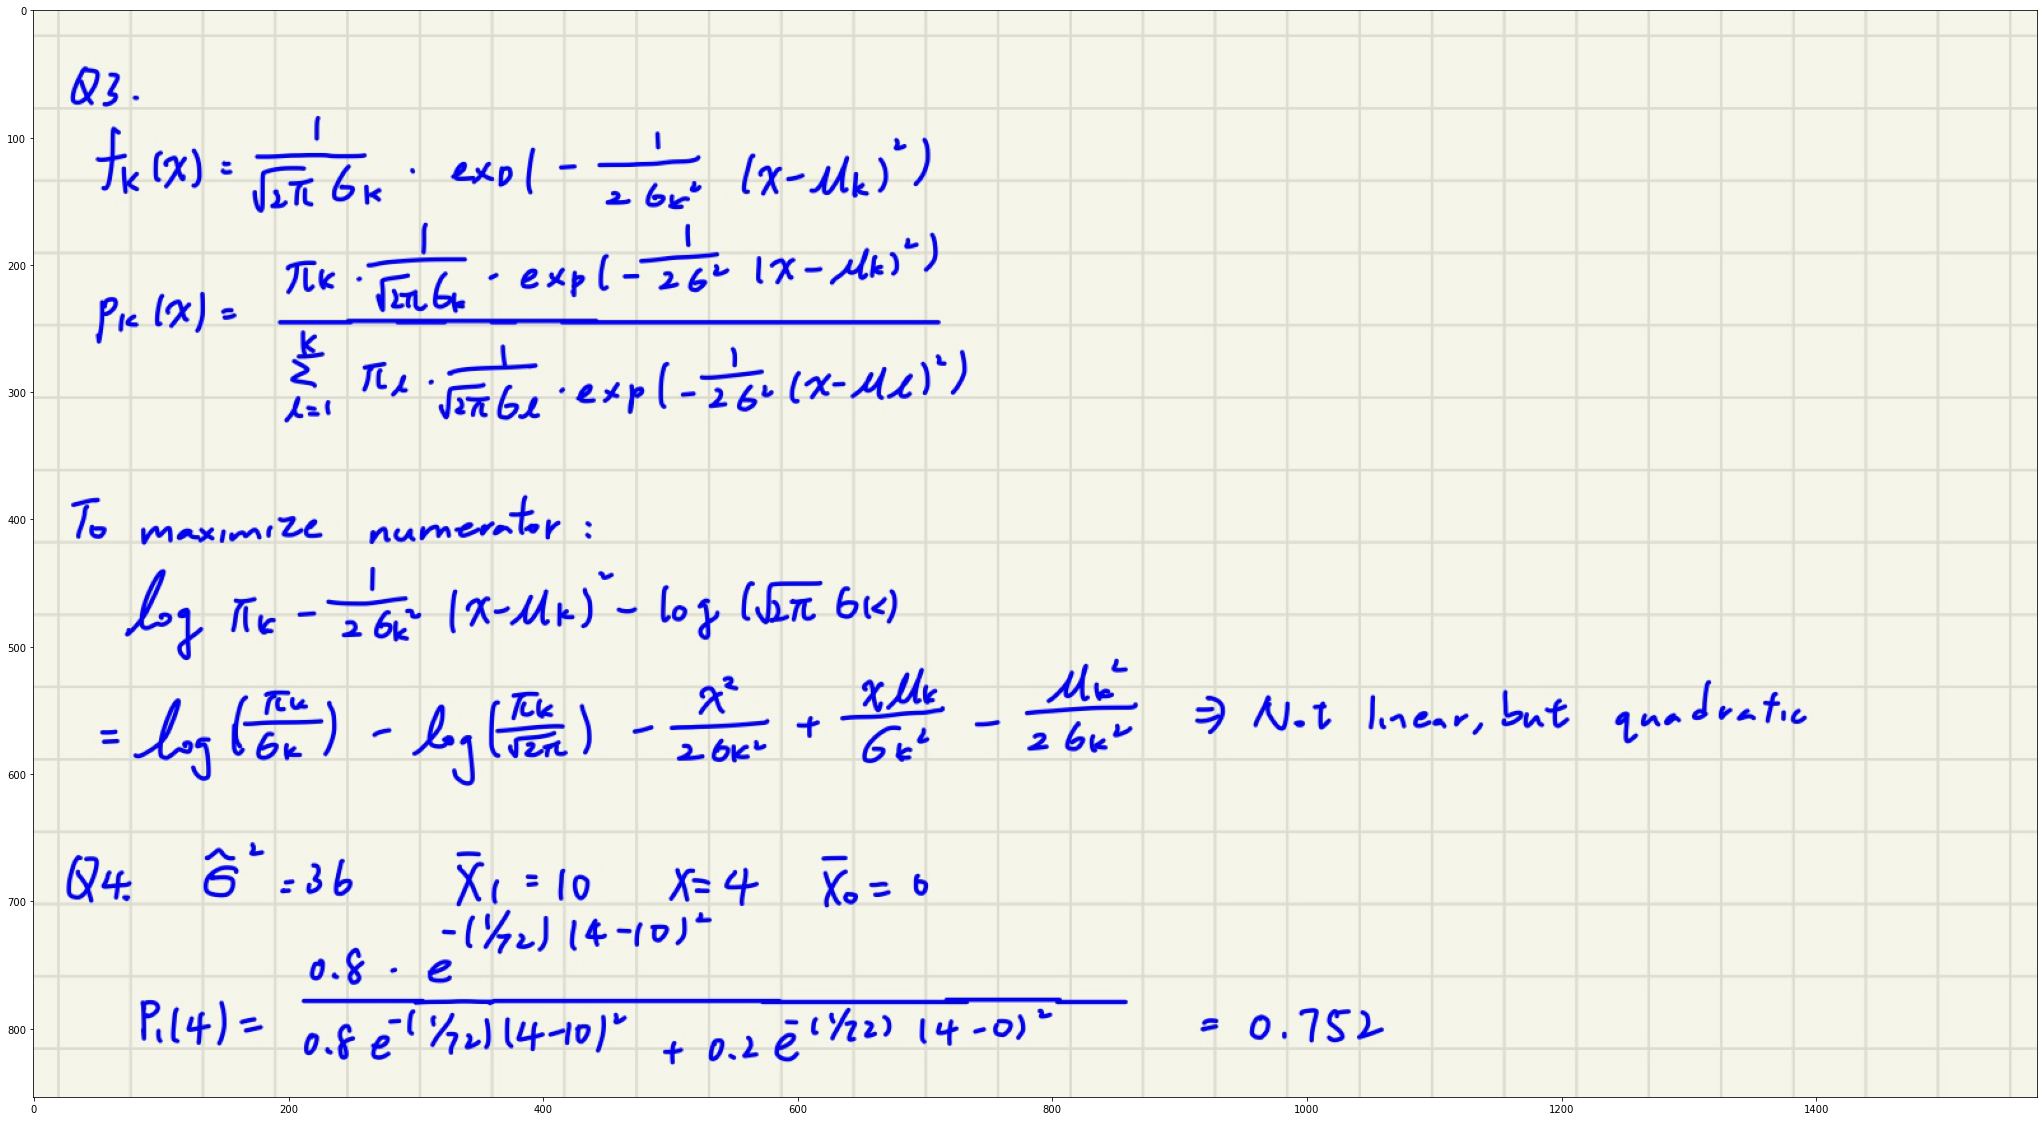

In [78]:
img=image.imread('..\\data\\DSCI552_HW4.jpeg')
plt.figure(figsize = (50,20))

plt.imshow(img)

plt.show()